In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_excel(r'/content/drive/MyDrive/data/Follow-up final data/URPP-Glass.xlsx', header = 3, sheet_name=None, usecols="A:H")
data2 = pd.read_excel(r'/content/drive/MyDrive/data/Follow-up final data/URPP-Metal.xlsx', header = 3, sheet_name=None, usecols="A:H")
data3 = pd.read_excel(r'/content/drive/MyDrive/data/Follow-up final data/URPP-Plastic.xlsx', header = 3, sheet_name=None, usecols="A:H")

all_data=[data1, data2, data3]
print(data1.keys())
print(data2.keys())
print(data3.keys())


dict_keys(['P3-NN', 'P3-SN', 'P3-MN', 'P4-NN', 'P4-SN', 'P4-MN', 'P5-NN', 'P5-SN', 'P5-MN', 'P6-NN', 'P6-SN', 'P6-MN', 'P16-NN', 'P16-SN', 'P16-MN', 'P17-NN', 'P17-SN', 'P17-MN', 'P27-NN', 'P27-SN', 'P27-MN', 'P28-NN', 'P28-SN', 'P28-MN', 'P34-NN', 'P34-SN', 'P34-MN', 'P35-NN', 'P35-SN', 'P35-MN', 'P36-NN', 'P36-SN', 'P36-MN', 'P37-NN', 'P37-SN', 'P37-MN', 'P38-NN', 'P38-SN', 'P38-MN', 'P39-NN', 'P39-SN', 'P39-MN', 'P40-NN', 'P40-SN', 'P40-MN', 'P41-NN', 'P41-SN', 'P41-MN', 'P42-NN', 'P42-SN', 'P42-MN', 'P43-NN', 'P43-SN', 'P43-MN'])
dict_keys(['P7-NN', 'P7-SN', 'P7-MN', 'P8-NN', 'P8-SN', 'P8-MN', 'P9-NN', 'P9-SN', 'P9-MN', 'P10-NN', 'P10-SN', 'P10-MN', 'P18-NN', 'P18-SN', 'P18-MN', 'P20-NN', 'P20-SN', 'P20-MN', 'P21-NN', 'P21-SN', 'P21-MN', 'P22-NN', 'P22-SN', 'P22-MN', 'P65-NN', 'P65-SN', 'P65-MN', 'P66-NN', 'P66-SN', 'P66-MN', 'P67-NN', 'P67-SN', 'P67-MN', 'P44-NN', 'P44-SN', 'P44-MN', 'P45-NN', 'P45-SN', 'P45-MN', 'P46-NN', 'P46-SN', 'P46-MN', 'P47-NN', 'P47-SN', 'P47-MN', 'P48-NN'

# **Formatting dataframes**

In [2]:
#winsorize the reation time such that we set the extreme values as the 95% percentile and the 6% percentile values
#treating the outliers this way
#can't really have outliers in the categorical data - even if it is there we wont be able to tell
import numpy as np
from scipy.stats.mstats import winsorize

for i in range(len(all_data)):
  for sheet_name, df in all_data[i].items():
    df['Normalized RT']= winsorize(df['Reaction Time'], limits=[0.05, 0.06])

#check
df_check = all_data[0].get('Mel-NN')
print(df_check)

None


In [3]:
#segregate data into noise categories
search_key1 = '-NN'
search_key2 = '-SN'
search_key3 = '-MN'

NN_all = {}
MN_all = {}
SN_all = {}

# loop through the list of dictionaries and save them into new dictionaries segregated by noise levels
for i in range(len(all_data)) :
  for sheet_name, df in all_data[i].items():
    df.drop(df.tail(1).index,inplace=True)
    if search_key1 in sheet_name:
      NN_all[sheet_name] = df
    elif search_key2 in sheet_name:
      SN_all[sheet_name]=df
    else:
      MN_all[sheet_name]=df

print("\n Noise Segregation across all rods: ")
print(NN_all.keys())
print(SN_all.keys())
print(MN_all.keys())

#segregate data into rod categories - only No Noise first - to compare different rod performances
search_key1 = '-NN'
search_key2 = '-SN'
search_key3 = '-MN'

Glass_NN={}
Metal_NN={}
Plastic_NN={}

Glass_SN={}
Metal_SN={}
Plastic_SN={}

Glass_MN={}
Metal_MN={}
Plastic_MN={}

for sheet_name, df in all_data[0].items():
    if search_key1 in sheet_name:
      Glass_NN[sheet_name] = df
    elif search_key2 in sheet_name:
      Glass_SN[sheet_name] = df
    else:
      Glass_MN[sheet_name] = df

for sheet_name, df in all_data[1].items():
    if search_key1 in sheet_name:
      Metal_NN[sheet_name] = df
    elif search_key2 in sheet_name:
      Metal_SN[sheet_name] = df
    else:
      Metal_MN[sheet_name] = df

for sheet_name, df in all_data[2].items():
    if search_key1 in sheet_name:
      Plastic_NN[sheet_name] = df
    elif search_key2 in sheet_name:
      Plastic_SN[sheet_name] = df
    else:
      Plastic_MN[sheet_name] = df
print("\n No noise: ")
print(Glass_NN.keys())
print(Metal_NN.keys())
print(Plastic_NN.keys())

print("\n Some noise: ")
print(Glass_SN.keys())
print(Metal_SN.keys())
print(Plastic_SN.keys())

print("\n More noise: ")
print(Glass_MN.keys())
print(Metal_MN.keys())
print(Plastic_MN.keys())




 Noise Segregation across all rods: 
dict_keys(['P3-NN', 'P4-NN', 'P5-NN', 'P6-NN', 'P16-NN', 'P17-NN', 'P27-NN', 'P28-NN', 'P34-NN', 'P35-NN', 'P36-NN', 'P37-NN', 'P38-NN', 'P39-NN', 'P40-NN', 'P41-NN', 'P42-NN', 'P43-NN', 'P7-NN', 'P8-NN', 'P9-NN', 'P10-NN', 'P18-NN', 'P20-NN', 'P21-NN', 'P22-NN', 'P65-NN', 'P66-NN', 'P67-NN', 'P44-NN', 'P45-NN', 'P46-NN', 'P47-NN', 'P48-NN', 'P49-NN', 'P50-NN', 'P1-NN', 'P2-NN', 'P13-NN', 'P14-NN', 'P19-NN', 'P24-NN', 'P25-NN', 'P29-NN', 'P30-NN', 'P32-NN', 'P51-NN', 'P52-NN', 'P53-NN', 'P56-NN', 'P57-NN', 'P54-NN', 'P61-NN', 'P62-NN'])
dict_keys(['P3-SN', 'P4-SN', 'P5-SN', 'P6-SN', 'P16-SN', 'P17-SN', 'P27-SN', 'P28-SN', 'P34-SN', 'P35-SN', 'P36-SN', 'P37-SN', 'P38-SN', 'P39-SN', 'P40-SN', 'P41-SN', 'P42-SN', 'P43-SN', 'P7-SN', 'P8-SN', 'P9-SN', 'P10-SN', 'P18-SN', 'P20-SN', 'P21-SN', 'P22-SN', 'P65-SN', 'P66-SN', 'P67-SN', 'P44-SN', 'P45-SN', 'P46-SN', 'P47-SN', 'P48-SN', 'P49-SN', 'P50-SN', 'P1-SN', 'P2-SN', 'P13-SN', 'P14-SN', 'P19-SN', 'P24-SN

In [4]:
#get names of all sheets so you can concat later
Glass_parts = []
Metal_parts = []
Plastic_parts = []

for sheet_name, df in all_data[0].items():
      Glass_parts.append(sheet_name)

for sheet_name, df in all_data[1].items():
      Metal_parts.append(sheet_name)

for sheet_name, df in all_data[2].items():
      Plastic_parts.append(sheet_name)

print(Glass_parts)
print(Metal_parts)
print(Plastic_parts)

#check 1
df_test = Glass_NN.get(Glass_parts[0])
print(df_test)

#check
Glass_parts[3].split('-')[0]
all_data[0].get(Glass_parts[3]).head(5)

#check
df_test2 = all_data[0].get(Glass_parts[0])
print(df_test2)

['P3-NN', 'P3-SN', 'P3-MN', 'P4-NN', 'P4-SN', 'P4-MN', 'P5-NN', 'P5-SN', 'P5-MN', 'P6-NN', 'P6-SN', 'P6-MN', 'P16-NN', 'P16-SN', 'P16-MN', 'P17-NN', 'P17-SN', 'P17-MN', 'P27-NN', 'P27-SN', 'P27-MN', 'P28-NN', 'P28-SN', 'P28-MN', 'P34-NN', 'P34-SN', 'P34-MN', 'P35-NN', 'P35-SN', 'P35-MN', 'P36-NN', 'P36-SN', 'P36-MN', 'P37-NN', 'P37-SN', 'P37-MN', 'P38-NN', 'P38-SN', 'P38-MN', 'P39-NN', 'P39-SN', 'P39-MN', 'P40-NN', 'P40-SN', 'P40-MN', 'P41-NN', 'P41-SN', 'P41-MN', 'P42-NN', 'P42-SN', 'P42-MN', 'P43-NN', 'P43-SN', 'P43-MN']
['P7-NN', 'P7-SN', 'P7-MN', 'P8-NN', 'P8-SN', 'P8-MN', 'P9-NN', 'P9-SN', 'P9-MN', 'P10-NN', 'P10-SN', 'P10-MN', 'P18-NN', 'P18-SN', 'P18-MN', 'P20-NN', 'P20-SN', 'P20-MN', 'P21-NN', 'P21-SN', 'P21-MN', 'P22-NN', 'P22-SN', 'P22-MN', 'P65-NN', 'P65-SN', 'P65-MN', 'P66-NN', 'P66-SN', 'P66-MN', 'P67-NN', 'P67-SN', 'P67-MN', 'P44-NN', 'P44-SN', 'P44-MN', 'P45-NN', 'P45-SN', 'P45-MN', 'P46-NN', 'P46-SN', 'P46-MN', 'P47-NN', 'P47-SN', 'P47-MN', 'P48-NN', 'P48-SN', 'P48-MN',

In [9]:
#concat all data per person for each person to test difference in rods - Glass
Glass_unique_parts = []

#get just participant ID/name of each sheet
for i in range(len(Glass_parts)):
  Glass_unique_parts.append(Glass_parts[i].split('-')[0])

#delete duplicate names (Each person shpuld have 3 entries)
print(Glass_unique_parts)
res = []
[res.append(x) for x in Glass_unique_parts if x not in res]
Glass_unique_parts = res
print(Glass_unique_parts)

#Now search the unique list of names and concat all dfs with same participant ID
Glass_all={}
for i in range(len(Glass_unique_parts)):
  df_same = pd.DataFrame()
  same = []
  for sheet_name, df in all_data[0].items():
    if str(sheet_name).split('-')[0] == Glass_unique_parts[i]:
      same.append(df)
  df_same = pd.concat(same)
  Glass_all[Glass_unique_parts[i]] = df_same

#check
print(Glass_all.keys())
df_test4 = Glass_all.get('P3')
print(df_test4)

['P3', 'P3', 'P3', 'P4', 'P4', 'P4', 'P5', 'P5', 'P5', 'P6', 'P6', 'P6', 'P16', 'P16', 'P16', 'P17', 'P17', 'P17', 'P27', 'P27', 'P27', 'P28', 'P28', 'P28', 'P34', 'P34', 'P34', 'P35', 'P35', 'P35', 'P36', 'P36', 'P36', 'P37', 'P37', 'P37', 'P38', 'P38', 'P38', 'P39', 'P39', 'P39', 'P40', 'P40', 'P40', 'P41', 'P41', 'P41', 'P42', 'P42', 'P42', 'P43', 'P43', 'P43']
['P3', 'P4', 'P5', 'P6', 'P16', 'P17', 'P27', 'P28', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43']
dict_keys(['P3', 'P4', 'P5', 'P6', 'P16', 'P17', 'P27', 'P28', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43'])
     Target Secondary Object           Audio   Option  Reaction Time  \
0     Metal            Glass    Glass-Glass1    Glass       4.434662   
1     Glass            Glass     Wood-Glass2     Wood       6.242470   
2      Wood            Glass     Wood-Glass2     Wood       2.485386   
3     Metal            Glass    Metal-Glass1    Metal       2.250629   
4   Plastic     

In [10]:
#concat all noise variations per person for each person to test difference in rods - Metal
Metal_unique_parts = []

#get just participant ID/name of each sheet
for i in range(len(Metal_parts)):
  Metal_unique_parts.append(Metal_parts[i].split('-')[0])

#delete duplicate names (Each person shpuld have 3 entries)
print(Metal_unique_parts)
res = []
[res.append(x) for x in Metal_unique_parts if x not in res]
Metal_unique_parts = res
print(Metal_unique_parts)

#Now search the unique list of names and concat all dfs with same participant ID
Metal_all={}
for i in range(len(Metal_unique_parts)):
  df_same = pd.DataFrame()
  same = []
  for sheet_name, df in all_data[1].items():
    if str(sheet_name).split('-')[0] == Metal_unique_parts[i]:
      same.append(df)
  df_same = pd.concat(same)
  Metal_all[Metal_unique_parts[i]] = df_same

  #check
print(Metal_all.keys())
df_test4 = Metal_all.get('P7')
print(df_test4)


['P7', 'P7', 'P7', 'P8', 'P8', 'P8', 'P9', 'P9', 'P9', 'P10', 'P10', 'P10', 'P18', 'P18', 'P18', 'P20', 'P20', 'P20', 'P21', 'P21', 'P21', 'P22', 'P22', 'P22', 'P65', 'P65', 'P65', 'P66', 'P66', 'P66', 'P67', 'P67', 'P67', 'P44', 'P44', 'P44', 'P45', 'P45', 'P45', 'P46', 'P46', 'P46', 'P47', 'P47', 'P47', 'P48', 'P48', 'P48', 'P49', 'P49', 'P49', 'P50', 'P50', 'P50']
['P7', 'P8', 'P9', 'P10', 'P18', 'P20', 'P21', 'P22', 'P65', 'P66', 'P67', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50']
dict_keys(['P7', 'P8', 'P9', 'P10', 'P18', 'P20', 'P21', 'P22', 'P65', 'P66', 'P67', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50'])
     Target Secondary Object           Audio   Option  Reaction Time  \
0   Plastic            Metal  Plastic-Metal1    Metal       8.700508   
1      Wood            Metal     Wood-Metal2     Wood       2.576244   
2     Glass            Metal     Wood-Metal2     Wood       2.862816   
3   Plastic            Metal  Plastic-Metal1    Metal       3.561775   
4     Metal

In [12]:
#concat all noise variations per person for each person to test difference in rods - Metal
Plastic_unique_parts = []

#get just participant ID/name of each sheet
for i in range(len(Plastic_parts)):
  Plastic_unique_parts.append(Plastic_parts[i].split('-')[0])

#delete duplicate names (Each person shpuld have 3 entries)
print(Plastic_unique_parts)
res = []
[res.append(x) for x in Plastic_unique_parts if x not in res]
Plastic_unique_parts = res
print(Plastic_unique_parts)


#Now search the unique list of names and concat all dfs with same participant ID
Plastic_all={}
for i in range(len(Plastic_unique_parts)):
  df_same = pd.DataFrame()
  same = []
  for sheet_name, df in all_data[2].items():
    if str(sheet_name).split('-')[0] == Plastic_unique_parts[i]:
      same.append(df)
  df_same = pd.concat(same)
  Plastic_all[Plastic_unique_parts[i]] = df_same

  #check
print(Plastic_all.keys())
df_test4 = Plastic_all.get('P1')
print(df_test4)

['P1', 'P1', 'P1', 'P2', 'P2', 'P2', 'P13', 'P13', 'P13', 'P14', 'P14', 'P14', 'P19', 'P19', 'P19', 'P24', 'P24', 'P24', 'P25', 'P25', 'P25', 'P29', 'P29', 'P29', 'P30', 'P30', 'P30', 'P32', 'P32', 'P32', 'P51', 'P51', 'P51', 'P52', 'P52', 'P52', 'P53', 'P53', 'P53', 'P56', 'P56', 'P56', 'P57', 'P57', 'P57', 'P54', 'P54', 'P54', 'P61', 'P61', 'P61', 'P62', 'P62', 'P62']
['P1', 'P2', 'P13', 'P14', 'P19', 'P24', 'P25', 'P29', 'P30', 'P32', 'P51', 'P52', 'P53', 'P56', 'P57', 'P54', 'P61', 'P62']
dict_keys(['P1', 'P2', 'P13', 'P14', 'P19', 'P24', 'P25', 'P29', 'P30', 'P32', 'P51', 'P52', 'P53', 'P56', 'P57', 'P54', 'P61', 'P62'])
     Target Secondary Object             Audio   Option  Reaction Time  \
0     Glass          Plastic     Wood-Plastic2  Plastic       3.588633   
1     Metal          Plastic    Glass-Plastic2    Metal       1.340664   
2   Plastic          Plastic  Plastic-Plastic2    Metal       2.852087   
3     Metal          Plastic    Metal-Plastic1    Glass       2.206760

In [14]:
#reset index so that multiples of the same values arent present in the index
for sheet_name, df in Glass_all.items():
      df.reset_index(drop=True, inplace=True)

for sheet_name, df in Metal_all.items():
      df.reset_index(drop=True, inplace=True)

for sheet_name, df in Plastic_all.items():
      df.reset_index(drop=True, inplace=True)

#CHECK

df_test4 = Glass_all.get('P5')
with pd.option_context('display.max_rows', None,):
    print(df_test4)


      Target Secondary Object           Audio   Option  Reaction Time  \
0      Glass            Glass     Wood-Glass2  Plastic       2.730473   
1       Wood            Glass     Wood-Glass2  Plastic       2.562727   
2       Wood            Glass  Plastic-Glass1     Wood       3.338823   
3    Plastic            Glass  Plastic-Glass1  Plastic       2.703506   
4      Glass            Glass    Glass-Glass2    Glass       2.968290   
5       Wood            Glass  Plastic-Glass2    Metal       1.755802   
6    Plastic            Glass    Metal-Glass1    Glass       2.121075   
7       Wood            Glass     Wood-Glass1     Wood       2.031120   
8    Plastic            Glass    Metal-Glass1    Metal       2.129341   
9      Metal            Glass    Glass-Glass1    Glass       2.895042   
10   Plastic            Glass  Plastic-Glass2  Plastic       2.471592   
11      Wood            Glass  Plastic-Glass2     Wood       1.936699   
12     Glass            Glass     Wood-Glass1     W

# **compare matching condition for all participants**


In [17]:
#all dicts:

print("\n Noise Segregation - across all rods: ")
print(NN_all.keys())
print(SN_all.keys())
print(MN_all.keys())

print("\n No noise segregated per rod: ")
print(Glass_NN.keys())
print(Metal_NN.keys())
print(Plastic_NN.keys())

print("\n Some noise segregated per rod: ")
print(Glass_SN.keys())
print(Metal_SN.keys())
print(Plastic_SN.keys())

print("\n More noise segregated per rod: ")
print(Glass_MN.keys())
print(Metal_MN.keys())
print(Plastic_MN.keys())

print("\n All noise data per person per rod: ")
print(Glass_all.keys())
print(Metal_all.keys())
print(Plastic_all.keys())

Noise_Categories = [NN_all, SN_all, MN_all]

No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
More_Noise = [Glass_MN, Metal_MN, Plastic_MN]

All_Rods = [Glass_all, Metal_all, Plastic_all]

Glass_Rod = [Glass_NN, Glass_SN, Glass_MN]
Metal_Rod = [Metal_NN, Metal_SN, Metal_MN]
Plastic_Rod = [Plastic_NN, Plastic_SN, Plastic_MN]


 Noise Segregation - across all rods: 
dict_keys(['P3-NN', 'P4-NN', 'P5-NN', 'P6-NN', 'P16-NN', 'P17-NN', 'P27-NN', 'P28-NN', 'P34-NN', 'P35-NN', 'P36-NN', 'P37-NN', 'P38-NN', 'P39-NN', 'P40-NN', 'P41-NN', 'P42-NN', 'P43-NN', 'P7-NN', 'P8-NN', 'P9-NN', 'P10-NN', 'P18-NN', 'P20-NN', 'P21-NN', 'P22-NN', 'P65-NN', 'P66-NN', 'P67-NN', 'P44-NN', 'P45-NN', 'P46-NN', 'P47-NN', 'P48-NN', 'P49-NN', 'P50-NN', 'P1-NN', 'P2-NN', 'P13-NN', 'P14-NN', 'P19-NN', 'P24-NN', 'P25-NN', 'P29-NN', 'P30-NN', 'P32-NN', 'P51-NN', 'P52-NN', 'P53-NN', 'P56-NN', 'P57-NN', 'P54-NN', 'P61-NN', 'P62-NN'])
dict_keys(['P3-SN', 'P4-SN', 'P5-SN', 'P6-SN', 'P16-SN', 'P17-SN', 'P27-SN', 'P28-SN', 'P34-SN', 'P35-SN', 'P36-SN', 'P37-SN', 'P38-SN', 'P39-SN', 'P40-SN', 'P41-SN', 'P42-SN', 'P43-SN', 'P7-SN', 'P8-SN', 'P9-SN', 'P10-SN', 'P18-SN', 'P20-SN', 'P21-SN', 'P22-SN', 'P65-SN', 'P66-SN', 'P67-SN', 'P44-SN', 'P45-SN', 'P46-SN', 'P47-SN', 'P48-SN', 'P49-SN', 'P50-SN', 'P1-SN', 'P2-SN', 'P13-SN', 'P14-SN', 'P19-SN', 'P24-

In [16]:
df_check = Glass_NN.get('P3-NN')
count =0
for i in df_check.index:
  if ((df_check['Matches Audio'][i] == 'Matches') and (df_check['Matches Target'][i] == 'Matches')):
    count=count+1
print(count)

23


In [18]:
##Compare different noise levels (currently set for metal rod)
'''
Noise_Categories = [NN_all, SN_all, MN_all]
Glass_Rod = [Glass_NN, Glass_SN, Glass_MN]
Metal_Rod = [Metal_NN, Metal_SN, Metal_MN]
Plastic_Rod = [Plastic_NN, Plastic_SN, Plastic_MN]

'''

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cat1_matching = []
cat1_avg = []
cat1_std = []

cat2_matching = []
cat2_avg = []
cat2_std = []

cat3_matching = []
cat3_avg = []
cat3_std = []

part_1 = 0
part_2 = 0
part_3 = 0

matching = [cat1_matching, cat2_matching, cat3_matching]
avg = [cat1_avg, cat2_avg, cat3_avg]
std = [cat1_std, cat2_std, cat3_std]

df_matching_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'N/L/H'])

for i in range(len(Glass_Rod)):
  for sheet_name, df in Glass_Rod[i].items():
    count =0
    sum_time = 0
    std_a = []
    total = 0

    for j in df.index:
      if (df['Target'][j] == df['Audio Source'][j]):
        total = total+1
      if ((df['Matches Audio'][j] == 'Matches') and (df['Matches Target'][j] == 'Matches')):
        count=count+1
        sum_time = sum_time + df['Normalized RT'][j]
        std_a.append(df['Normalized RT'][j])
        if(i==0):
          df_matching_var.loc[len(df_matching_var.index)] = [part_1, df['Normalized RT'][j],'No Noise']
        elif(i==1):
           df_matching_var.loc[len(df_matching_var.index)] = [part_2, df['Normalized RT'][j],'Low Noise']
        else:
          df_matching_var.loc[len(df_matching_var.index)] = [part_3, df['Normalized RT'][j],'High Noise']

    matching[i].append((count/total)*100)
    avg[i].append(sum_time/count)
    std[i].append(np.std(std_a))
    if(i==0):
      part_1=part_1+1
    elif(i==1):
      part_2=part_2+1
    else:
      part_3=part_3+1

print(cat1_matching)
print(cat2_matching)
print(cat3_matching)


[57.49999999999999, 70.0, 62.5, 82.5, 62.5, 47.5, 67.5, 75.0, 52.5, 37.5, 97.5, 52.5, 40.0, 50.0, 45.0, 60.0, 50.0, 52.5]
[60.0, 52.5, 47.5, 62.5, 67.5, 62.5, 72.5, 62.5, 45.0, 57.49999999999999, 100.0, 45.0, 62.5, 45.0, 62.5, 67.5, 52.5, 45.0]
[60.0, 45.0, 52.5, 72.5, 57.49999999999999, 65.0, 72.5, 42.5, 97.5, 62.5, 97.5, 50.0, 62.5, 45.0, 57.49999999999999, 52.5, 37.5, 97.5]


    No Noise  No Noise average  No Noise std  Low Noise  Low Noise average  \
0       57.5          4.028066      1.731375       60.0           3.454873   
1       70.0          3.581953      1.728004       52.5           2.875211   
2       62.5          2.046127      0.372597       47.5           2.580128   
3       82.5          2.298215      0.927988       62.5           1.885916   
4       62.5          1.840425      0.464577       67.5           1.791318   
5       47.5          2.297605      0.670826       62.5           2.115626   
6       67.5          2.969908      1.186043       72.5           2.124350   
7       75.0          3.501704      1.717918       62.5           1.757078   
8       52.5          1.769474      0.402654       45.0           2.723338   
9       37.5          1.917706      0.339093       57.5           1.962085   
10      97.5          2.176050      0.478130      100.0           2.423116   
11      52.5          1.769474      0.402654       45.0         

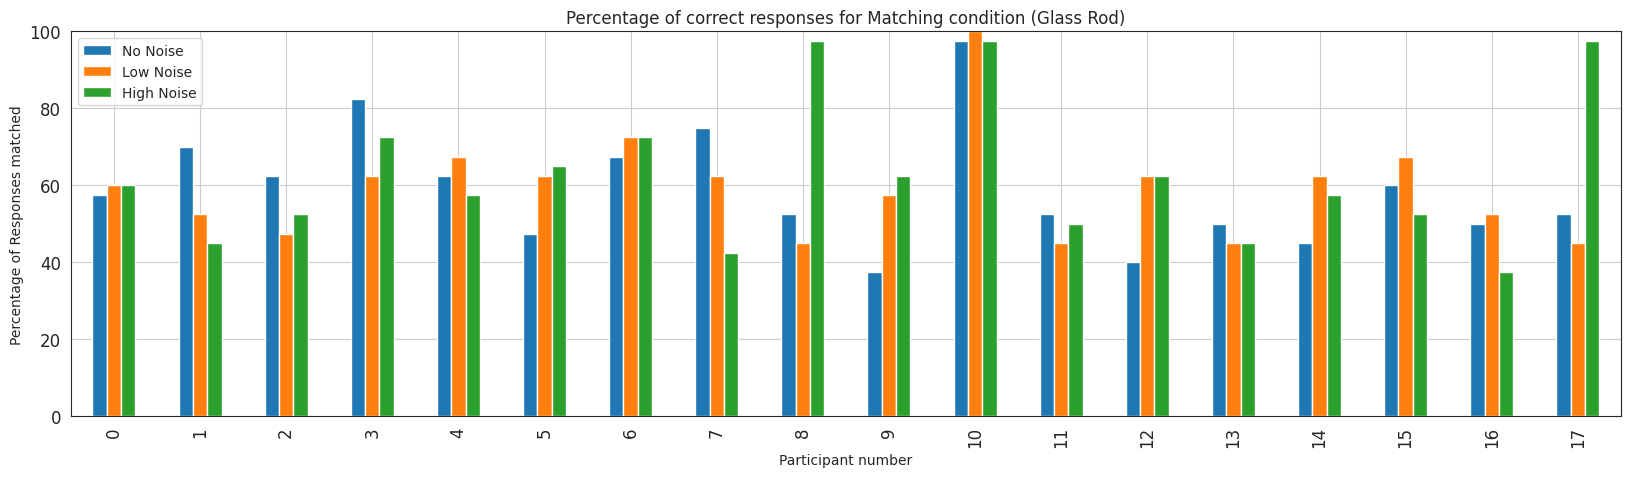

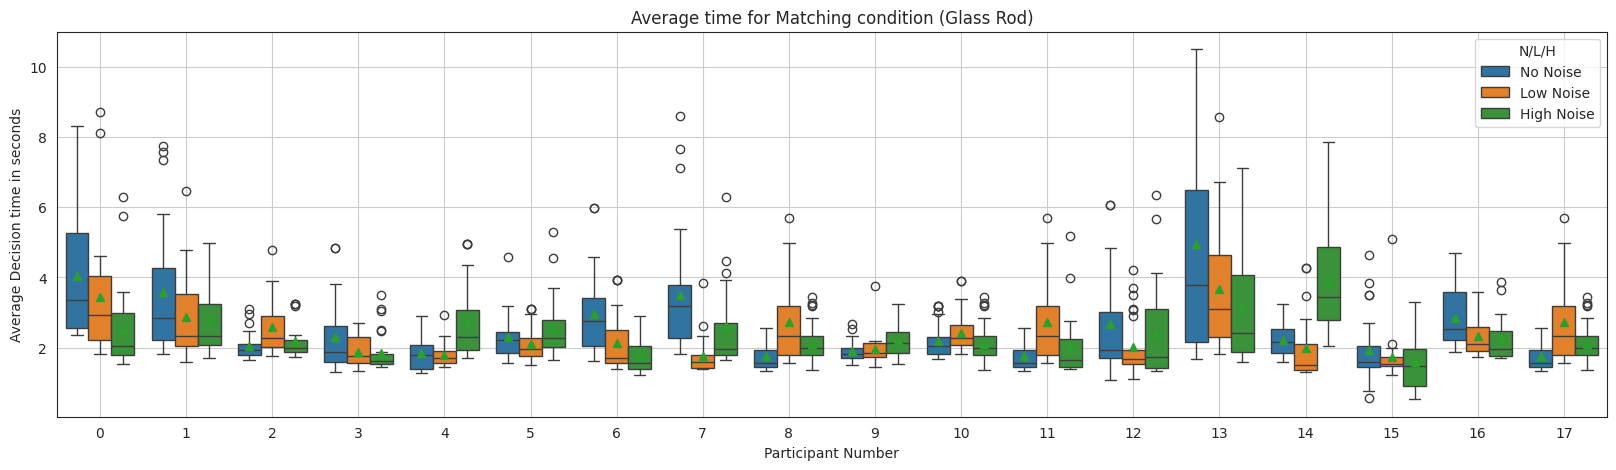

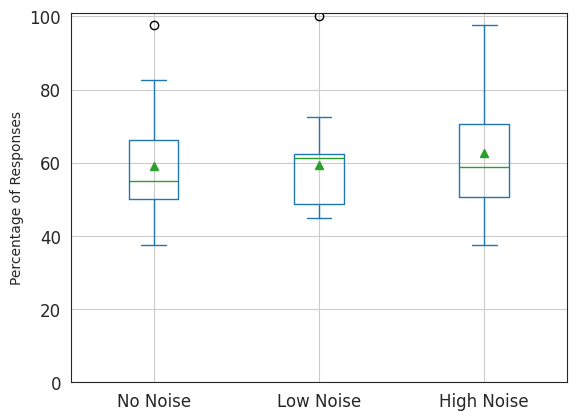

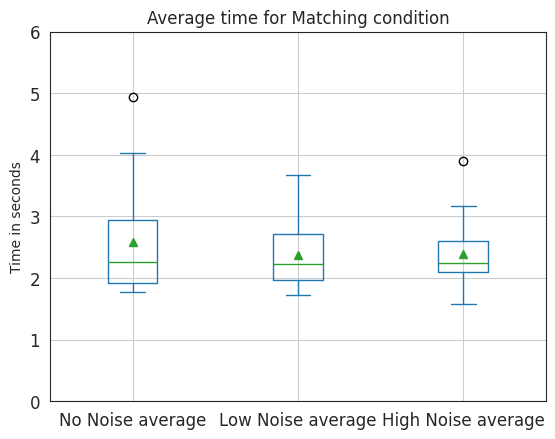

In [19]:
df_chart_matches = pd.DataFrame()
df_chart_matches['No Noise'] = cat1_matching
df_chart_matches['No Noise average'] = cat1_avg
df_chart_matches['No Noise std'] = cat1_std
df_chart_matches['Low Noise'] = cat2_matching
df_chart_matches['Low Noise average'] = cat2_avg
df_chart_matches['Low Noise std'] = cat2_std
df_chart_matches['High Noise'] = cat3_matching
df_chart_matches['High Noise average'] = cat3_avg
df_chart_matches['High Noise std'] = cat3_std

print(df_chart_matches)
print(df_matching_var)


#plt.style.use('ggplot')
sns.set_style("white")

# Plotting the number of correct responses
ax1 = df_chart_matches[['No Noise', 'Low Noise', 'High Noise']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses matched')
ax1.set_title('Percentage of correct responses for Matching condition (Glass Rod)')
plt.savefig('Matching condition response (Glass Rod)', bbox_inches='tight')
plt.grid(True)
plt.show()

fig, ax6 = plt.subplots(figsize=(20,5))
ax6.set_title('Average time for Matching condition (Glass Rod)')
sns.boxplot(data=df_matching_var, x="Participant Number", y="Decision time", hue="N/L/H", showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")
plt.savefig('Matching condition time (Glass Rod)', bbox_inches='tight')
plt.grid(True)
plt.show()

ax4 = df_chart_matches[['No Noise', 'Low Noise', 'High Noise']].plot(kind='box', legend=True, fontsize=12, showmeans=True)
ax4.set(ylim =(0, 101))
#ax4.set_title('Percentage of Responses correctly categorized for Matching condition')
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of Responses')
plt.grid(True)
plt.show()

ax5 = df_chart_matches[['No Noise average', 'Low Noise average', 'High Noise average']].plot(kind='box', legend=True, fontsize=12, showmeans=True)
ax5.set(ylim =(0, 6))
ax5.set_title('Average time for Matching condition')
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Time in seconds')
plt.grid(True)
plt.show()

In [20]:
##compare different rods for matching condition
'''
#No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
#Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
#More_Noise = [Glass_MN, Metal_MN, Plastic_MN]

#All_Rods = [Glass_all, Metal_all, Plastic_all]
'''

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


cat1_matching = []
cat2_matching = []
cat3_matching = []

part_overall = 0

df_matching_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'Rod'])
df_matching_cat = pd.DataFrame(columns = ['Participant Number', 'Average Response', 'Average Time', 'Std', 'Rod'])

#for i in range(len(No_Noise)):
#  for sheet_name, df in No_Noise[i].items():
#for i in range(len(Some_Noise)):
#  for sheet_name, df in Some_Noise[i].items():
#for i in range(len(More_Noise)):
#  for sheet_name, df in More_Noise[i].items():
for i in range(len(All_Rods)):
  for sheet_name, df in All_Rods[i].items():
    count =0
    sum_time = 0
    std_a = []
    total = 0
    for j in df.index:
      if (df['Target'][j] == df['Audio Source'][j]):
        total = total+1
      if ((df['Matches Audio'][j] == 'Matches') and (df['Matches Target'][j] == 'Matches')):
        count=count+1
        sum_time = sum_time + df['Normalized RT'][j]
        std_a.append(df['Normalized RT'][j])
        if(i==0):
          df_matching_var.loc[len(df_matching_var.index)] = [part_overall, df['Normalized RT'][j],'Glass']
        elif(i==1):
           df_matching_var.loc[len(df_matching_var.index)] = [part_overall, df['Normalized RT'][j],'Metal']
        else:
          df_matching_var.loc[len(df_matching_var.index)] = [part_overall, df['Normalized RT'][j],'Plastic']

    if(i==0):
      cat1_matching.append((count/total)*100)
      df_matching_cat.loc[len(df_matching_cat.index)] = [part_overall, (count/total)*100, sum_time/count, np.std(std_a), 'Glass']
    elif(i==1):
      cat2_matching.append((count/total)*100)
      df_matching_cat.loc[len(df_matching_cat.index)] = [part_overall, (count/total)*100, sum_time/count, np.std(std_a), 'Metal']
    else:
      cat3_matching.append((count/total)*100)
      df_matching_cat.loc[len(df_matching_cat.index)] = [part_overall, (count/total)*100, sum_time/count, np.std(std_a), 'Plastic']
    part_overall = part_overall+1

print(cat1_matching)
print(cat2_matching)
print(cat3_matching)

print(df_matching_var)
print(df_matching_cat)




[59.166666666666664, 55.833333333333336, 54.166666666666664, 72.5, 62.5, 58.333333333333336, 70.83333333333334, 60.0, 65.0, 52.5, 98.33333333333333, 49.166666666666664, 55.00000000000001, 46.666666666666664, 55.00000000000001, 60.0, 46.666666666666664, 65.0]
[58.333333333333336, 55.833333333333336, 99.16666666666667, 59.166666666666664, 61.66666666666667, 76.66666666666667, 46.666666666666664, 64.16666666666667, 70.83333333333334, 50.83333333333333, 69.16666666666667, 48.333333333333336, 58.333333333333336, 43.333333333333336, 49.166666666666664, 52.5, 53.333333333333336, 51.66666666666667]
[52.5, 83.33333333333334, 56.666666666666664, 78.33333333333333, 53.333333333333336, 55.833333333333336, 55.833333333333336, 63.33333333333333, 45.83333333333333, 41.66666666666667, 45.83333333333333, 70.83333333333334, 54.166666666666664, 50.42016806722689, 44.166666666666664, 51.66666666666667, 45.0, 44.166666666666664]
      Participant Number  Decision time      Rod
0                      0     

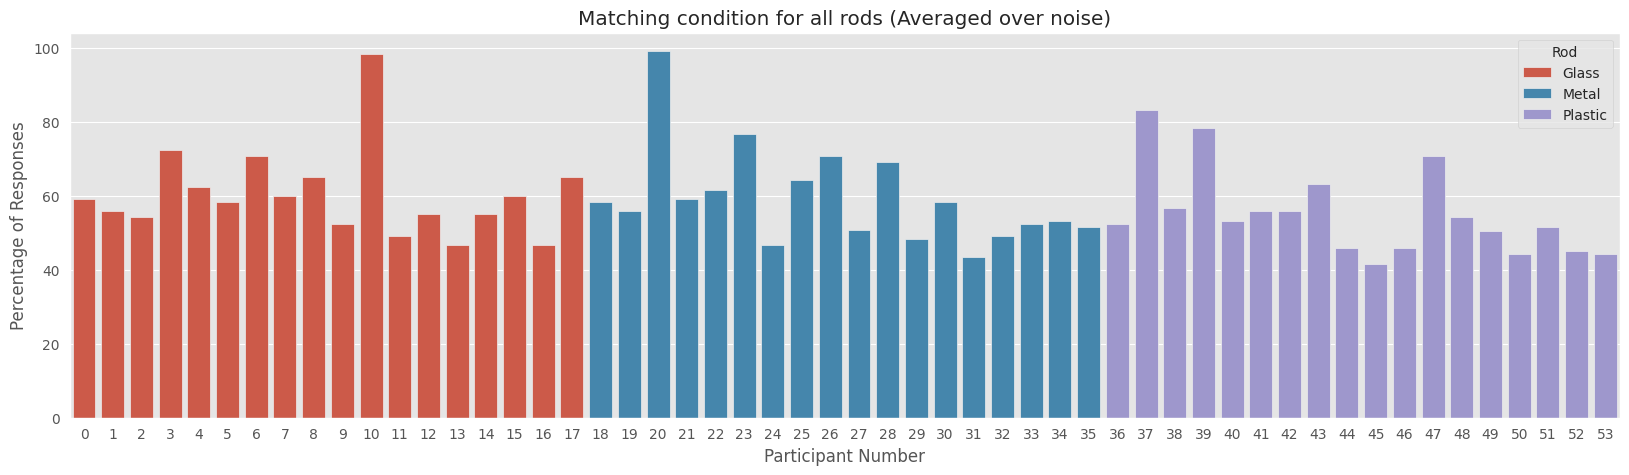

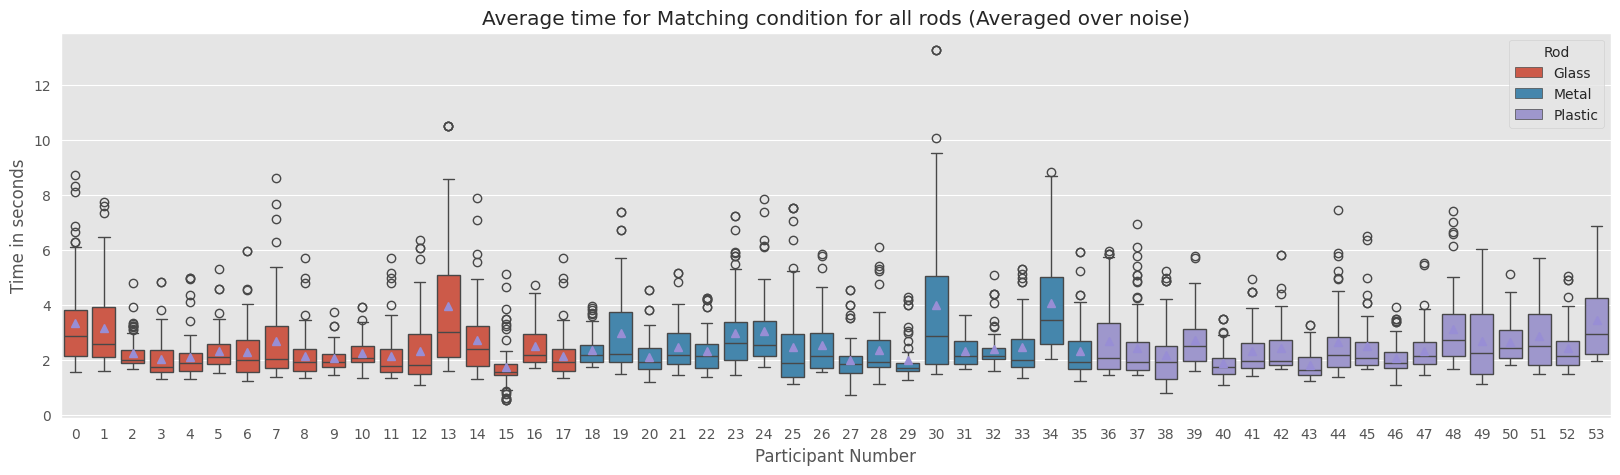

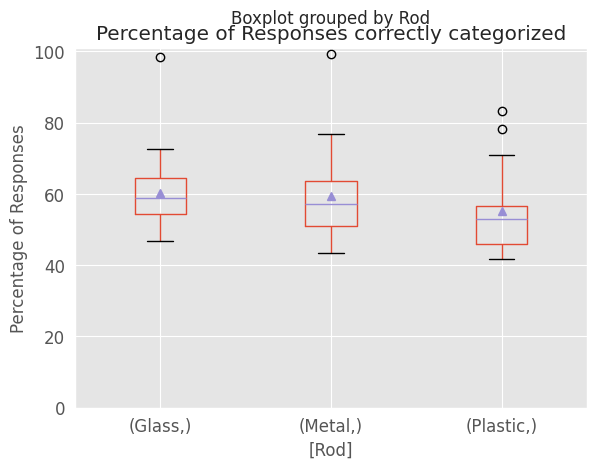

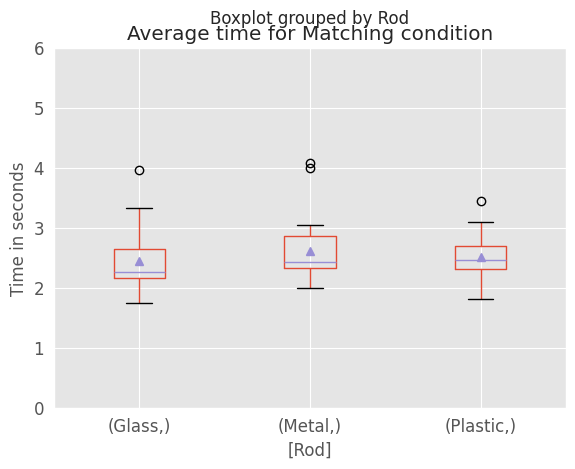

In [21]:
plt.style.use('ggplot')
#sns.set_style("white")


fig, ax = plt.subplots(figsize=(20,5))
ax.set_title('Matching condition for all rods (Averaged over noise)')
sns.barplot(data=df_matching_cat, x="Participant Number", y="Average Response", hue="Rod",)
ax.set_ylabel("Percentage of Responses")
plt.savefig('Matching condition response (All Rod)', bbox_inches='tight')
plt.show()


fig, ax6 = plt.subplots(figsize=(20,5))
ax6.set_title('Average time for Matching condition for all rods (Averaged over noise)')
sns.boxplot(data=df_matching_var, x="Participant Number", y="Decision time", hue="Rod", showmeans=True)
ax6.set_ylabel("Time in seconds")
plt.savefig('Matching condition time (All Rod)', bbox_inches='tight')
plt.show()

ax4 = df_matching_cat.boxplot(column=['Average Response'], by=['Rod'], fontsize=12, showmeans=True)
#df_matching_cat[['Average Response']].plot(kind='box', legend=True, fontsize=12, showmeans=True, hue="Rod")
ax4.set(ylim =(0, 101))
ax4.set_title('Percentage of Responses correctly categorized')
#ax4.set_xlabel('Agent vs Self-Interaction')
ax4.set_ylabel('Percentage of Responses')
plt.show()

ax5 = df_matching_cat.boxplot(column=['Average Time'], by=['Rod'], fontsize=12, showmeans=True)
ax5.set(ylim =(0, 6))
ax5.set_title('Average time for Matching condition')
#ax5.set_xlabel('Agent vs Self-Interaction')
ax5.set_ylabel('Time in seconds')
plt.show()


# **compare overall response and response time for all participants - matches audio, matches target, doesn't match either**

In [22]:
#check same rod all noise levels for A/V/N - minus matching
cat1 = Glass_all
cat2 = Metal_all
cat3 = Plastic_all

'''
'''
#No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
#Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
#More_Noise = [Glass_MN, Metal_MN, Plastic_MN]

#All_Rods = [Glass_all, Metal_all, Plastic_all]
'''
'''
cat = [cat1, cat2, cat3]

matching_audio_1 = []
audio_avg_1 = []
matching_video_1 = []
video_avg_1 = []
matching_none_1 = []
none_avg_1 = []

matching_audio_2 = []
audio_avg_2 = []
matching_video_2 = []
video_avg_2 = []
matching_none_2 = []
none_avg_2 = []

matching_audio_3 = []
audio_avg_3 = []
matching_video_3 = []
video_avg_3 = []
matching_none_3 = []
none_avg_3 = []

part_1 = 0
part_2 = 0
part_3 = 0
df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N','Rod'])
#df_cat = pd.DataFrame(columns = ['Participant Number', 'Average Response', 'Average Time', 'Std', 'Rod'])

for j in range(len(cat)):
  for sheet_name, df in cat[j].items():
    count_a = 0
    count_v = 0
    count_n = 0
    sum_time_a = 0
    sum_time_v = 0
    sum_time_n = 0
    for i in df.index:
      if (df['Target'][i] != df['Audio Source'][i]):
        if (df['Matches Audio'][i] == 'Matches'):
          count_a=count_a+1
          sum_time_a = sum_time_a + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Audio','Glass']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Audio','Metal']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Audio','Plastic']

        if (df['Matches Target'][i] == 'Matches'):
          count_v=count_v+1
          sum_time_v = sum_time_v + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Video','Glass']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Video','Metal']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Video','Plastic']

        if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
          count_n = count_n+1
          sum_time_n = sum_time_n + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Neither','Glass']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Neither','Metal']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Neither','Plastic']

    if(j==0):
      matching_audio_1.append((count_a/40)*100)
      matching_video_1.append((count_v/40)*100)
      matching_none_1.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_1.append(sum_time_a/count_a)
      else:
        audio_avg_1.append(0)
      if(count_v != 0):
        video_avg_1.append(sum_time_v/count_v)
      else:
        video_avg_1.append(0)
      if(count_n != 0):
        none_avg_1.append(sum_time_n/count_n)
      else:
        none_avg_1.append(0)
      part_1=part_1+1

    elif (j==1):
      matching_audio_2.append((count_a/40)*100)
      matching_video_2.append((count_v/40)*100)
      matching_none_2.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_2.append(sum_time_a/count_a)
      else:
        audio_avg_2.append(0)
      if(count_v != 0):
        video_avg_2.append(sum_time_v/count_v)
      else:
        video_avg_2.append(0)
      if(count_n != 0):
        none_avg_2.append(sum_time_n/count_n)
      else:
        none_avg_2.append(0)
      part_2=part_2+1

    else:
      matching_audio_3.append((count_a/40)*100)
      matching_video_3.append((count_v/40)*100)
      matching_none_3.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_3.append(sum_time_a/count_a)
      else:
        audio_avg_3.append(0)
      if(count_v != 0):
        video_avg_3.append(sum_time_v/count_v)
      else:
        video_avg_3.append(0)
      if(count_n != 0):
        none_avg_3.append(sum_time_n/count_n)
      else:
        none_avg_3.append(0)
      part_3=part_3+1

'''
for individual noise case
glass_aud = sum(matching_audio_1)/8
glass_vid = sum(matching_video_1)/8
glass_no = sum(matching_none_1)/8

plastic_aud = sum(matching_audio_3)/8
plastic_vid = sum(matching_video_3)/8
plastic_no = sum(matching_none_3)/8

metal_aud = sum(matching_audio_2)/8
metal_vid = sum(matching_video_2)/8
metal_no = sum(matching_none_2)/8
'''
#was 48 before for some reason, using glass1 file)
glass_aud = sum(matching_audio_1)/54
glass_vid = sum(matching_video_1)/54
glass_no = sum(matching_none_1)/54

plastic_aud = sum(matching_audio_3)/54
plastic_vid = sum(matching_video_3)/54
plastic_no = sum(matching_none_3)/54

metal_aud = sum(matching_audio_2)/54
metal_vid = sum(matching_video_2)/54
metal_no = sum(matching_none_2)/54

print(glass_aud)
print(glass_vid)
print(glass_no)

print(metal_aud)
print(metal_vid)
print(metal_no)

print(plastic_aud)
print(plastic_vid)
print(plastic_no)


40.370370370370374
28.703703703703702
30.925925925925927
36.99074074074074
34.629629629629626
28.37962962962963
34.21296296296296
31.48148148148148
34.30555555555556


                  Glass Rod      Metal  Plastic Rod
Matching Audio    40.370370  36.990741    34.212963
Matching Video    28.703704  34.629630    31.481481
Matching neither  30.925926  28.379630    34.305556


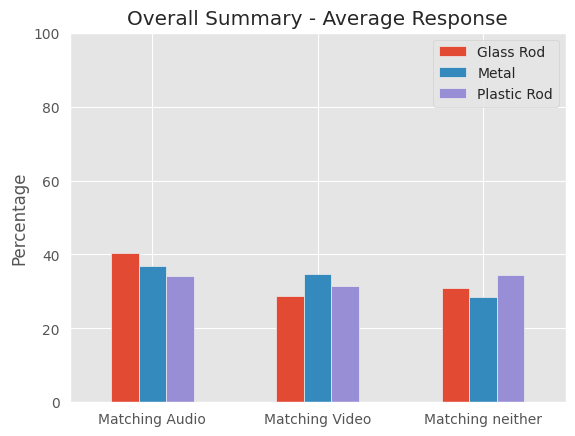

In [23]:
Glass_info = [glass_aud, glass_vid, glass_no]
Metal_info = [metal_aud, metal_vid, metal_no]
Plastic_info = [plastic_aud, plastic_vid, plastic_no]

#All = [df_all_desc['Matching Audio']['mean'], df_all_desc['Matching Target']['mean'], df_all_desc['Matching Neither']['mean']]
index = ['Matching Audio', 'Matching Video', 'Matching neither']
#df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
#                   'Self-Interaction': Self_Interaction,
#                   'All trials': All}, index=index)

df = pd.DataFrame({'Glass Rod': Glass_info,
                   'Metal': Metal_info,
                   'Plastic Rod': Plastic_info}, index=index)
print(df)
ax = df.plot.bar(rot=0)
ax.set(ylim =(0, 100))
ax.set_title('Overall Summary - Average Response')
ax.set_ylabel('Percentage')
plt.savefig('A-V-N Response', bbox_inches='tight')
plt.show()

In [24]:
#check same rod all noise levels for A/V/N - minus matching

cat1 = Plastic_NN
cat2 = Plastic_SN
cat3 = Plastic_MN


''' why??? this set??
cat1 = Glass_MN
cat2 = Metal_MN
cat3 = Plastic_MN
'''
'''
cat1 = NN_all
cat2 = SN_all
cat3 = MN_all

cat1 = Glass_NN
cat2 = Glass_SN
cat3 = Glass_MN

cat1 = Metal_NN
cat2 = Metal_SN
cat3 = Metal_MN

cat1 = Plastic_NN
cat2 = Plastic_SN
cat3 = Plastic_MN
'''
cat = [cat1, cat2, cat3]

matching_audio_1 = []
audio_avg_1 = []
matching_video_1 = []
video_avg_1 = []
matching_none_1 = []
none_avg_1 = []

matching_audio_2 = []
audio_avg_2 = []
matching_video_2 = []
video_avg_2 = []
matching_none_2 = []
none_avg_2 = []

matching_audio_3 = []
audio_avg_3 = []
matching_video_3 = []
video_avg_3 = []
matching_none_3 = []
none_avg_3 = []

part_1 = 0
part_2 = 0
part_3 = 0
df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N', 'NN/SN/MN'])
#df_cat = pd.DataFrame(columns = ['Participant Number', 'Average Response', 'Average Time', 'Std', 'Rod'])

for j in range(len(cat)):
  for sheet_name, df in cat[j].items():
    count_a = 0
    count_v = 0
    count_n = 0
    sum_time_a = 0
    sum_time_v = 0
    sum_time_n = 0
    for i in df.index:
      if (df['Target'][i] != df['Audio Source'][i]):
        if (df['Matches Audio'][i] == 'Matches'):
          count_a=count_a+1
          sum_time_a = sum_time_a + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Audio','NN']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Audio','SN']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Audio','MN']

        if (df['Matches Target'][i] == 'Matches'):
          count_v=count_v+1
          sum_time_v = sum_time_v + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Video','NN']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Video','SN']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Video','MN']

        if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
          count_n = count_n+1
          sum_time_n = sum_time_n + df['Normalized RT'][i]
          if(j==0):
            df_var.loc[len(df_var.index)] = [part_1, df['Normalized RT'][i],'Neither','NN']
          elif(j==1):
            df_var.loc[len(df_var.index)] = [part_2, df['Normalized RT'][i],'Neither','SN']
          else:
            df_var.loc[len(df_var.index)] = [part_3, df['Normalized RT'][i],'Neither','MN']

    if(j==0):
      matching_audio_1.append((count_a/40)*100)
      matching_video_1.append((count_v/40)*100)
      matching_none_1.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_1.append(sum_time_a/count_a)
      else:
        audio_avg_1.append(0)
      if(count_v != 0):
        video_avg_1.append(sum_time_v/count_v)
      else:
        video_avg_1.append(0)
      if(count_n != 0):
        none_avg_1.append(sum_time_n/count_n)
      else:
        none_avg_1.append(0)
      part_1=part_1+1

    elif (j==1):
      matching_audio_2.append((count_a/40)*100)
      matching_video_2.append((count_v/40)*100)
      matching_none_2.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_2.append(sum_time_a/count_a)
      else:
        audio_avg_2.append(0)
      if(count_v != 0):
        video_avg_2.append(sum_time_v/count_v)
      else:
        video_avg_2.append(0)
      if(count_n != 0):
        none_avg_2.append(sum_time_n/count_n)
      else:
        none_avg_2.append(0)
      part_2=part_2+1

    else:
      matching_audio_3.append((count_a/40)*100)
      matching_video_3.append((count_v/40)*100)
      matching_none_3.append((count_n/40)*100)
      if(count_a != 0):
        audio_avg_3.append(sum_time_a/count_a)
      else:
        audio_avg_3.append(0)
      if(count_v != 0):
        video_avg_3.append(sum_time_v/count_v)
      else:
        video_avg_3.append(0)
      if(count_n != 0):
        none_avg_3.append(sum_time_n/count_n)
      else:
        none_avg_3.append(0)
      part_3=part_3+1

matching_audio = []
audio_avg = []
matching_video = []
video_avg = []
matching_none = []
none_avg= []

for i in range(len(matching_audio_1)):
  matching_audio.append((matching_audio_1[i]+matching_audio_2[i]+matching_audio_3[i])/3)
  audio_avg.append((audio_avg_1[i]+audio_avg_2[i]+audio_avg_3[i])/3)
  matching_video.append((matching_video_1[i]+matching_video_2[i]+matching_video_3[i])/3)
  video_avg.append((video_avg_1[i]+video_avg_2[i]+video_avg_3[i])/3)
  matching_none.append((matching_none_1[i]+matching_none_2[i]+matching_none_3[i])/3)
  none_avg.append((none_avg_1[i]+none_avg_2[i]+none_avg_3[i])/3)

print(matching_audio)
print(matching_video)
print(matching_none)

#print(audio_avg)
#print(matching_video)

[37.5, 38.333333333333336, 34.166666666666664, 19.166666666666668, 14.166666666666666, 36.666666666666664, 48.333333333333336, 28.333333333333332, 25.833333333333332, 43.333333333333336, 45.833333333333336, 24.166666666666668, 46.666666666666664, 42.5, 25.833333333333332, 27.5, 35.0, 42.5]
[25.0, 44.166666666666664, 33.333333333333336, 62.5, 48.333333333333336, 25.0, 20.833333333333332, 42.5, 27.5, 15.833333333333334, 21.666666666666668, 42.5, 19.166666666666668, 22.5, 27.5, 45.0, 27.5, 15.833333333333334]
[37.5, 17.5, 32.5, 18.333333333333332, 37.5, 38.333333333333336, 30.833333333333332, 29.166666666666668, 46.666666666666664, 40.833333333333336, 32.5, 33.333333333333336, 34.166666666666664, 35.0, 46.666666666666664, 27.5, 37.5, 41.666666666666664]


    Matching Audio  Audio average  Matching Target  Target average  \
0        37.500000       2.454003        25.000000        3.101171   
1        38.333333       3.202524        44.166667        2.750469   
2        34.166667       2.305090        33.333333        2.411167   
3        19.166667       2.045408        62.500000        3.013569   
4        14.166667       1.900916        48.333333        1.823749   
5        36.666667       2.300199        25.000000        1.994084   
6        48.333333       2.261824        20.833333        2.490448   
7        28.333333       1.794839        42.500000        1.659569   
8        25.833333       3.597075        27.500000        2.520084   
9        43.333333       2.945129        15.833333        3.718746   
10       45.833333       2.040928        21.666667        2.305330   
11       24.166667       2.237910        42.500000        2.458374   
12       46.666667       3.002525        19.166667        3.124344   
13       42.500000  

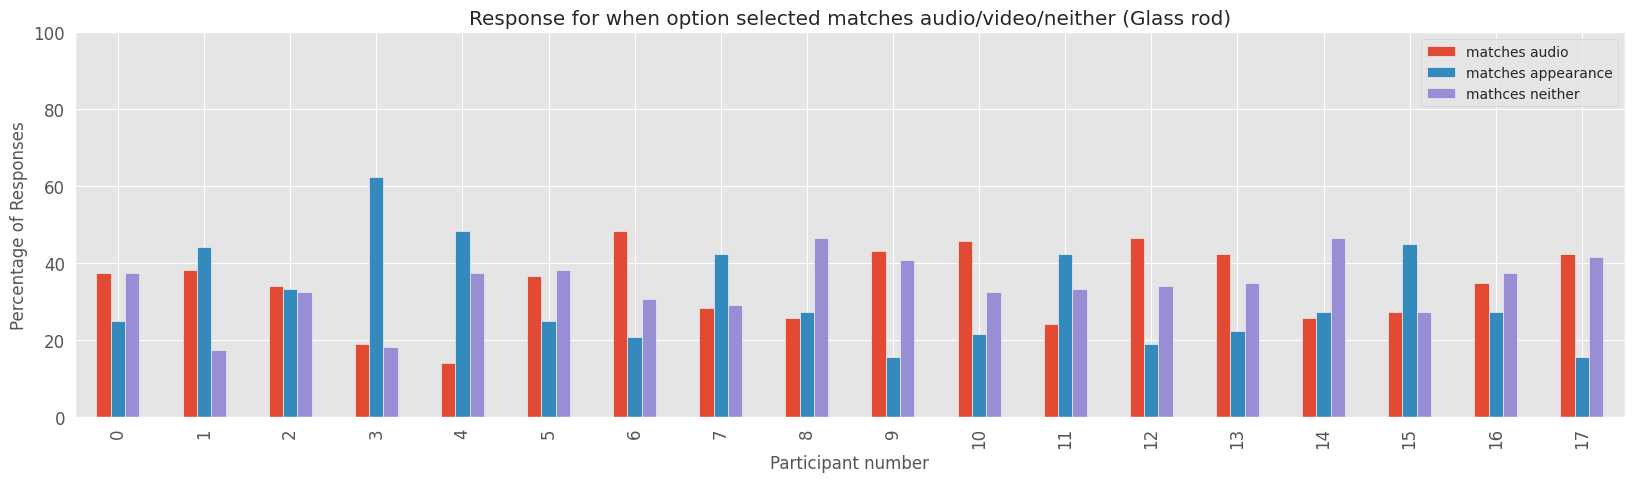

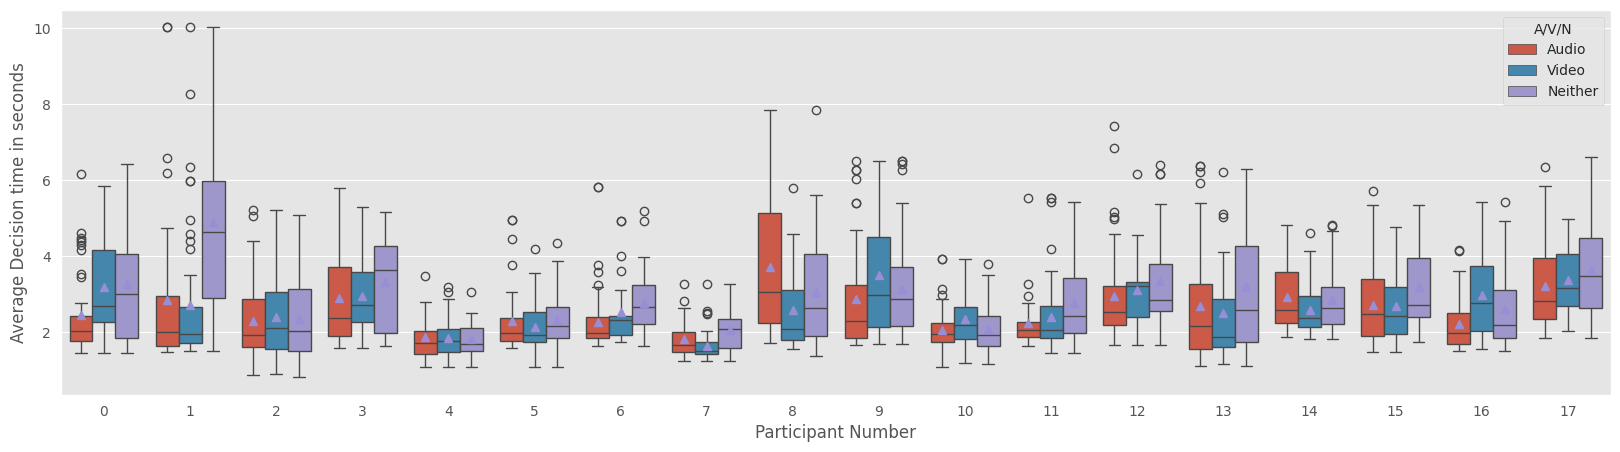

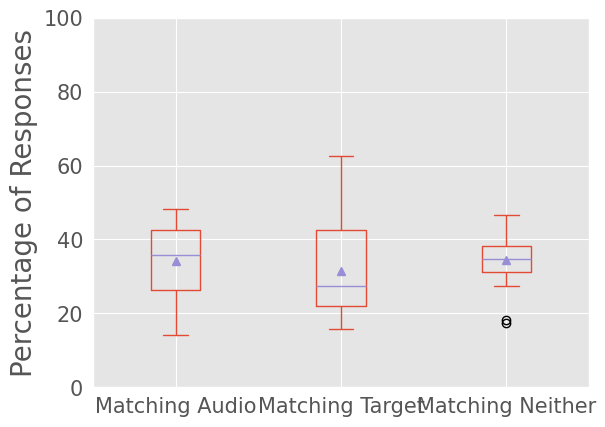

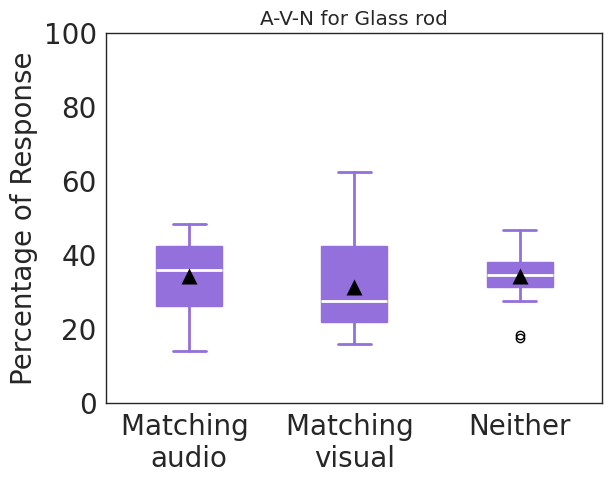

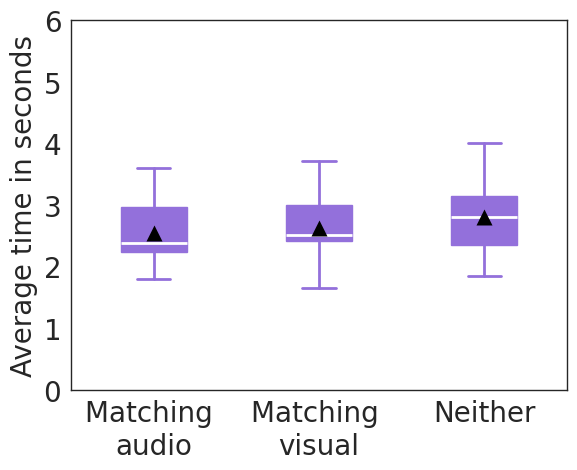

In [25]:
##dataframes and plots
df_chart_all = pd.DataFrame()
df_chart_all['Matching Audio'] = matching_audio
df_chart_all['Audio average'] = audio_avg
df_chart_all['Matching Target'] = matching_video
df_chart_all['Target average'] = video_avg
df_chart_all['Matching Neither'] = matching_none
df_chart_all['Neither average'] = none_avg

mylabels = ['matches audio', 'matches appearance', 'mathces neither']


print(df_chart_all)
print(df_var)
plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart_all[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.legend(labels=mylabels)
ax1.set_title('Response for when option selected matches audio/video/neither (Glass rod)')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.savefig('A-V-N Response Glass rod', bbox_inches='tight')
plt.show()

myord = ["Audio", "Video", "Neither"]

fig, ax6 = plt.subplots(figsize=(20,5))
#ax6.set_title('Average time overall')
sns.boxplot(x="Participant Number", y="Decision time", data=df_var,  hue="A/V/N", hue_order= myord, showmeans=True)
ax6.set_ylabel("Average Decision time in seconds")
#ax6.legend(loc="upper left", ncol = 3, labels=mylabels)



ax4 = df_chart_all[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='box', legend=True, fontsize=15, showmeans=True)
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('Audio vs Appearance vs Neither')
ax4.set_ylabel('Percentage of Responses', fontsize = 20)
#ax4.set_title('Response overall')
plt.show()
'''
ax5 = df_chart_all[['Audio average', 'Target average', 'Neither average']].plot(kind='box', legend=True, fontsize=15, showmeans=True)
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Audio vs Appearance vs Neither')
ax5.set_ylabel('Average time in seconds', fontsize = 20)
#ax5.set_title('Response and average time overall')
plt.show()
'''
sns.set_style("white")

ax4 = df_chart_all[['Matching Audio', 'Matching Target', 'Matching Neither']].plot(kind='box', legend=True, widths = 0.4, fontsize=20, showmeans=True, patch_artist = True,
                               boxprops = dict(facecolor = "mediumpurple", color = 'mediumpurple'), medianprops = dict(color = "white", linewidth = 2),
                               meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
                               whiskerprops = dict(color = "mediumpurple", linewidth = 2), capprops = dict(color = "mediumpurple", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('A/V/N (Metal Rod)')
labels = ['Matching \naudio', 'Matching \nvisual', 'Neither']
ax4.set_ylabel('Percentage of Response', fontsize = 20)
ax4.set_title('A-V-N for Glass rod')
ax4.set_xticklabels(labels)
#plt.setp(ax4.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.savefig('A-V-N Response boxes Glass rod', bbox_inches='tight')
plt.show()

ax5 = df_chart_all[['Audio average', 'Target average', 'Neither average']].plot(kind='box', legend=True, widths = 0.4, fontsize=20, showmeans=True, patch_artist = True,
                               boxprops = dict(facecolor = "mediumpurple", color = 'mediumpurple'), medianprops = dict(color = "white", linewidth = 2),
                               meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
                               whiskerprops = dict(color = "mediumpurple", linewidth = 2), capprops = dict(color = "mediumpurple", linewidth = 2))
ax5.set(ylim =(0, 6))
#ax5.set_xlabel('Audio vs Appearance vs Neither')
ax5.set_ylabel('Average time in seconds',fontsize = 20)
labels = ['Matching \naudio', 'Matching \nvisual', 'Neither']
ax5.set_xticklabels(labels)
#ax5.set_title('Response and average time overall')
plt.show()

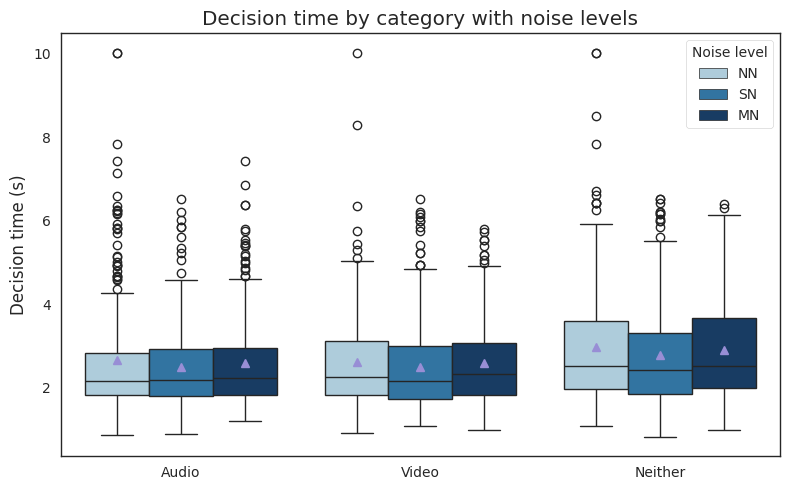

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

order_AVN = ["Audio", "Video", "Neither"]
order_noise = ["NN", "SN", "MN"]
pal = {"NN":"#a6cee3", "SN":"#1f78b4", "MN":"#0b3c6f"}  # tweak as you like

plt.figure(figsize=(8,5))
ax = sns.boxplot(
    data=df_var,
    x="A/V/N", y="Decision time",
    hue="NN/SN/MN",
    order=order_AVN, hue_order=order_noise,
    palette=pal, showmeans=True
)
ax.set_xlabel("")
ax.set_ylabel("Decision time (s)")
ax.set_title("Decision time by category with noise levels")
ax.legend(title="Noise level", loc="upper right")
plt.tight_layout()
plt.show()

     Participant Response Noise  Percent
0              0    Audio    NN     37.5
1              0   Visual    NN     20.0
2              0  Neither    NN     42.5
3              1    Audio    NN     25.0
4              1   Visual    NN     37.5
..           ...      ...   ...      ...
157           16   Visual    MN     22.5
158           16  Neither    MN     42.5
159           17    Audio    MN     45.0
160           17   Visual    MN     12.5
161           17  Neither    MN     42.5

[162 rows x 4 columns]


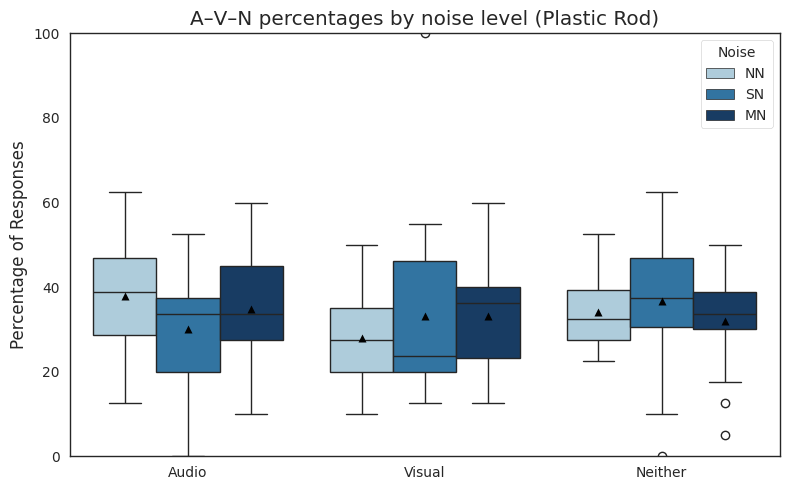

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

participants = range(len(matching_audio_1))

rows = []
def add_rows(noise, a_list, v_list, n_list):
    for pid, (a,v,n) in enumerate(zip(a_list, v_list, n_list)):
        rows.append({"Participant": pid, "Response": "Audio",   "Noise": noise, "Percent": a})
        rows.append({"Participant": pid, "Response": "Visual",  "Noise": noise, "Percent": v})
        rows.append({"Participant": pid, "Response": "Neither", "Noise": noise, "Percent": n})

add_rows("NN", matching_audio_1, matching_video_1, matching_none_1)
add_rows("SN", matching_audio_2, matching_video_2, matching_none_2)
add_rows("MN", matching_audio_3, matching_video_3, matching_none_3)

df_resp = pd.DataFrame(rows)

print(df_resp)
# --- 3) Boxplot: 3 boxes per response, one for each noise level ---
order_resp = ["Audio", "Visual", "Neither"]
order_noise = ["NN", "SN", "MN"]
palette = {"NN":"#a6cee3", "SN":"#1f78b4", "MN":"#0b3c6f"}  # tweak as you like

plt.figure(figsize=(8,5))
ax = sns.boxplot(
    data=df_resp, x="Response", y="Percent",
    hue="Noise", order=order_resp, hue_order=order_noise,
    palette=palette, showmeans=True,
    meanprops=dict(marker='^', markerfacecolor='black', markeredgecolor='none', markersize=6)
)
ax.set_ylim(0, 100)
ax.set_ylabel("Percentage of Responses")
ax.set_xlabel("")
ax.set_title("A–V–N percentages by noise level (Plastic Rod)")
ax.legend(title="Noise")
plt.tight_layout()
plt.savefig('A-V-N Response boxes by noise (Plastic Rod)', bbox_inches='tight')
plt.show()

# **Avg analysis - uses frames from last block**

df_vars:
     Participant Number  Decision time    A/V/N
0                     0       3.588633  Neither
1                     0       1.562622    Video
2                     0       1.827637    Audio
3                     0       2.282530    Video
4                     0       3.780159  Neither
..                  ...            ...      ...
715                  17       3.529938  Neither
716                  17       2.004181    Audio
717                  17       2.411896    Audio
718                  17       3.309082  Neither
719                  17       2.004181  Neither

[720 rows x 3 columns]
     Participant Number  Decision time    A/V/N
0                     0       3.541955  Neither
1                     0       2.273709    Video
2                     0       1.995182    Audio
3                     0       4.104095  Neither
4                     0       2.214485    Audio
..                  ...            ...      ...
715                  17       2.172272  Neither
716    

Text(0, 0.5, 'Time in seconds')

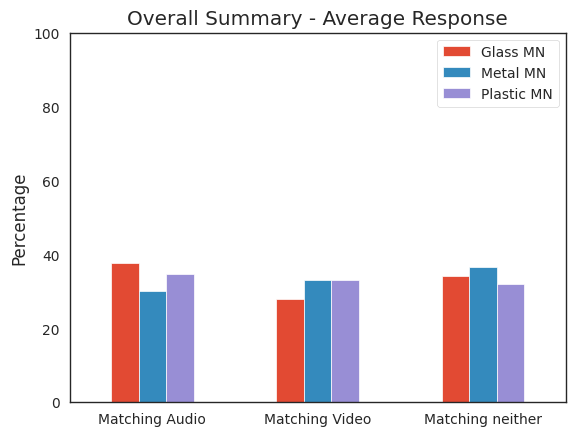

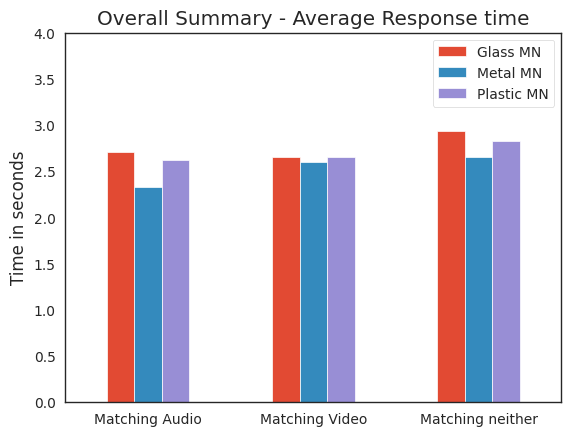

In [28]:
##all below wrt above cat1, cat2, cat3
#df_var = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N', 'A/S'])
df_var_1 = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N'])
df_var_2 = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N'])
df_var_3 = pd.DataFrame(columns = ['Participant Number', 'Decision time', 'A/V/N'])

for i in df_var.index:
  if(df_var['NN/SN/MN'][i] == 'NN'):
    df_var_1.loc[len(df_var_1.index)] = [df_var['Participant Number'][i], df_var['Decision time'][i], df_var['A/V/N'][i]]
  elif (df_var['NN/SN/MN'][i] == 'SN'):
    df_var_2.loc[len(df_var_2.index)] = [df_var['Participant Number'][i], df_var['Decision time'][i], df_var['A/V/N'][i]]
  else:
    df_var_3.loc[len(df_var_3.index)] = [df_var['Participant Number'][i], df_var['Decision time'][i], df_var['A/V/N'][i]]

print("df_vars:")
print(df_var_1)
print(df_var_2)
print(df_var_3)

##dataframes and plots for just NN
df_chart_1 = pd.DataFrame()
df_chart_1['Matching Audio'] = matching_audio_1
df_chart_1['Audio average'] = audio_avg_1
df_chart_1['Matching Target'] = matching_video_1
df_chart_1['Target average'] = video_avg_1
df_chart_1['Matching Neither'] = matching_none_1
df_chart_1['Neither average'] = none_avg_1
#df_chart_1_means = [df_chart_1['Matching Audio'].sum()/24, df_chart_1['Matching Target'].sum()/24, df_chart_1['Matching Neither'].sum()/24 ]
#df_chart_1_means = [df_chart_1['Matching Audio'].sum()/16, df_chart_1['Matching Target'].sum()/16, df_chart_1['Matching Neither'].sum()/16 ]
df_chart_1_means = [df_chart_1['Matching Audio'].sum()/18, df_chart_1['Matching Target'].sum()/18, df_chart_1['Matching Neither'].sum()/18 ]
#(divide by number of datasets being considered)

##dataframes and plots for just SN
df_chart_2 = pd.DataFrame()
df_chart_2['Matching Audio'] = matching_audio_2
df_chart_2['Audio average'] = audio_avg_2
df_chart_2['Matching Target'] = matching_video_2
df_chart_2['Target average'] = video_avg_2
df_chart_2['Matching Neither'] = matching_none_2
df_chart_2['Neither average'] = none_avg_2
#df_chart_2_means = [df_chart_2['Matching Audio'].sum()/24, df_chart_2['Matching Target'].sum()/24, df_chart_2['Matching Neither'].sum()/24 ]
#df_chart_2_means = [df_chart_2['Matching Audio'].sum()/16, df_chart_2['Matching Target'].sum()/16, df_chart_2['Matching Neither'].sum()/16 ]
df_chart_2_means = [df_chart_2['Matching Audio'].sum()/18, df_chart_2['Matching Target'].sum()/18, df_chart_2['Matching Neither'].sum()/18 ]


##dataframes and plots for just MN
df_chart_3 = pd.DataFrame()
df_chart_3['Matching Audio'] = matching_audio_3
df_chart_3['Audio average'] = audio_avg_3
df_chart_3['Matching Target'] = matching_video_3
df_chart_3['Target average'] = video_avg_3
df_chart_3['Matching Neither'] = matching_none_3
df_chart_3['Neither average'] = none_avg_3
#df_chart_3_means = [df_chart_3['Matching Audio'].sum()/24, df_chart_3['Matching Target'].sum()/24, df_chart_3['Matching Neither'].sum()/24 ]
#df_chart_3_means = [df_chart_3['Matching Audio'].sum()/16, df_chart_3['Matching Target'].sum()/16, df_chart_3['Matching Neither'].sum()/16 ]
df_chart_3_means = [df_chart_3['Matching Audio'].sum()/18, df_chart_3['Matching Target'].sum()/18, df_chart_3['Matching Neither'].sum()/18 ]


print("df_chart_1_means:")
print(df_chart_1_means)


#print(df_chart_all)
df_all_desc=df_chart_all.describe()
#df_chart_all.describe()

#print(df_chart_1)
df_1_desc=df_chart_1.describe()
#df_chart_1.describe()

#print(df_chart_2)
df_2_desc=df_chart_2.describe()
#df_chart_2.describe()

#print(df_chart_3)
df_3_desc=df_chart_3.describe()
#df_chart_3.describe()

df_compare_desc = pd.DataFrame()

df_compare_desc['NN Matching Audio'] = df_1_desc['Matching Audio']
df_compare_desc['SN Matching Audio'] = df_2_desc['Matching Audio']
df_compare_desc['MN Matching Audio'] = df_3_desc['Matching Audio']

df_compare_desc['NN Audio average'] = df_1_desc['Audio average']
df_compare_desc['SN Audio average'] = df_2_desc['Audio average']
df_compare_desc['MN Audio average'] = df_3_desc['Audio average']

df_compare_desc['NN Matching Target'] = df_1_desc['Matching Target']
df_compare_desc['SN Matching Target'] = df_2_desc['Matching Target']
df_compare_desc['MN Matching Target'] = df_3_desc['Matching Target']

df_compare_desc['NN Target average'] = df_1_desc['Target average']
df_compare_desc['SN Target average'] = df_2_desc['Target average']
df_compare_desc['MN Target average'] = df_3_desc['Target average']

df_compare_desc['NN Matching Neither'] = df_1_desc['Matching Neither']
df_compare_desc['SN Matching Neither'] =df_2_desc['Matching Neither']
df_compare_desc['MN Matching Neither'] =df_3_desc['Matching Neither']

df_compare_desc['NN Neither average'] = df_1_desc['Neither average']
df_compare_desc['SN Neither average'] = df_2_desc['Neither average']
df_compare_desc['MN Neither average'] = df_3_desc['Neither average']

#print(df_compare_desc)

NN_info = [df_chart_1_means[0], df_chart_1_means[1], df_chart_1_means[2]]
SN_info = [df_chart_2_means[0], df_chart_2_means[1], df_chart_2_means[2]]
MN_info = [df_chart_3_means[0], df_chart_3_means[1], df_chart_3_means[2]]

#All = [df_all_desc['Matching Audio']['mean'], df_all_desc['Matching Target']['mean'], df_all_desc['Matching Neither']['mean']]
index = ['Matching Audio', 'Matching Video', 'Matching neither']
#df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
#                   'Self-Interaction': Self_Interaction,
#                   'All trials': All}, index=index)

df = pd.DataFrame({'Glass MN': NN_info,
                   'Metal MN': SN_info,
                   'Plastic MN': MN_info}, index=index)
print(df)
ax = df.plot.bar(rot=0)
ax.set(ylim =(0, 100))
ax.set_title('Overall Summary - Average Response')
ax.set_ylabel('Percentage')

NN_info = [df_compare_desc['NN Audio average']['mean'], df_compare_desc['NN Target average']['mean'], df_compare_desc['NN Neither average']['mean']]
SN_info = [df_compare_desc['SN Audio average']['mean'], df_compare_desc['SN Target average']['mean'], df_compare_desc['SN Neither average']['mean']]
MN_info = [df_compare_desc['MN Audio average']['mean'], df_compare_desc['MN Target average']['mean'], df_compare_desc['MN Neither average']['mean']]
index = ['Matching Audio', 'Matching Video', 'Matching neither']
df2 = pd.DataFrame({'Glass MN': NN_info,
                   'Metal MN': SN_info,
                   'Plastic MN': MN_info}, index=index)
print(df2)
ax2 = df2.plot.bar(rot=0)
ax2.set(ylim =(0, 4))
ax2.set_title('Overall Summary - Average Response time')
ax2.set_ylabel('Time in seconds')

                     No Noise  Low Noise  High Noise
Matching \nAudio    37.777778  30.138889   34.722222
Matching \nVideo    28.055556  33.194444   33.194444
Matching \nneither  34.166667  36.666667   32.083333


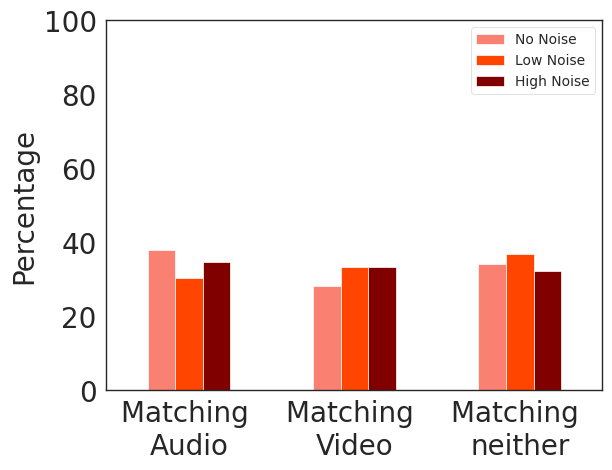

In [29]:
import seaborn as sns
sns.set_style("white")

colors = {"No Noise": "salmon", "Low Noise": "orangered", "High Noise":"maroon"} #all condition

NN_info = [df_chart_1_means[0], df_chart_1_means[1], df_chart_1_means[2]]
SN_info = [df_chart_2_means[0], df_chart_2_means[1], df_chart_2_means[2]]
MN_info = [df_chart_3_means[0], df_chart_3_means[1], df_chart_3_means[2]]

#All = [df_all_desc['Matching Audio']['mean'], df_all_desc['Matching Target']['mean'], df_all_desc['Matching Neither']['mean']]
index = ['Matching \nAudio', 'Matching \nVideo', 'Matching \nneither']
#df = pd.DataFrame({'Agent Interaction': Agent_Interaction,
#                   'Self-Interaction': Self_Interaction,
#                   'All trials': All}, index=index)

df = pd.DataFrame({'No Noise': NN_info,
                   'Low Noise': SN_info,
                   'High Noise': MN_info}, index=index)
print(df)
ax = df.plot.bar(rot=0, color = colors, fontsize = 20)
ax.set(ylim =(0, 100))
#ax.text(0.1, 0.87, 'Response during Noise conditions \naveraged across all rods', transform=ax.transAxes, fontsize=12)
#ax.set_title('Overall Summary - Average Response')
ax.set_ylabel('Percentage', fontsize = 20)
plt.savefig('overall noise.png', bbox_inches='tight')
plt.show()


# **Matching Audio/video/rod/neither comparaisons**

                Glass Rod      Metal  Plastic Rod
Matching Audio  28.703704  40.925926    35.277778
Matching Video  28.796296  27.129630    33.518519
Matching Rod    32.962963  15.925926    18.796296
Matching none    9.537037  16.018519    12.407407


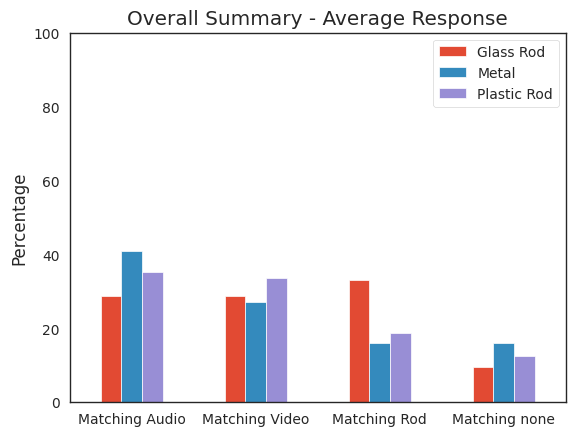

In [30]:
# check for if it matches the rod instead - glass rod, check only conditions t.plastic+a.metal and t.wood+a.plastic
#check same rod all noise levels for A/V/N - minus matching
cat1 = Glass_all
cat2 = Metal_all
cat3 = Plastic_all

'''
'''
#No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
#Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
#More_Noise = [Glass_MN, Metal_MN, Plastic_MN]

#All_Rods = [Glass_all, Metal_all, Plastic_all]
'''
'''
#cat = [cat1, cat2, cat3]

matching_audio_1 = []
matching_video_1 = []
matching_none_1 = []
matching_rod_1 =[]

matching_audio_2 = []
matching_video_2 = []
matching_none_2 = []
matching_rod_2 =[]

matching_audio_3 = []
matching_video_3 = []
matching_none_3 = []
matching_rod_3 =[]

part_1 = 0
part_2 = 0
part_3 = 0
df_var2 = pd.DataFrame(columns = ['Participant Number', 'Texture', 'Audio', 'A/V/N/R','Rod'])
#df_cat = pd.DataFrame(columns = ['Participant Number', 'Average Response', 'Average Time', 'Std', 'Rod'])

for sheet_name, df in cat1.items():
  count_a = 0
  count_v = 0
  count_n = 0
  count_r= 0

  for i in df.index:
    if (((df['Target'][i] == 'Plastic') and (df['Audio Source'][i] == 'Metal')) or ((df['Target'][i] == 'Wood') and (df['Audio Source'][i] == 'Plastic'))):
      if (df['Matches Audio'][i] == 'Matches'):
        count_a=count_a+1
        df_var2.loc[len(df_var2.index)] = [part_1, df['Target'][i], df['Audio Source'][i],'Audio','Glass']
      if (df['Matches Target'][i] == 'Matches'):
        count_v=count_v+1
        df_var2.loc[len(df_var2.index)] = [part_1,df['Target'][i], df['Audio Source'][i],'Video','Glass']
      if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
        if ((df['Option'][i]) != 'Glass'):
          count_n = count_n+1
          df_var2.loc[len(df_var2.index)] = [part_1,df['Target'][i], df['Audio Source'][i],'Neither','Glass']
      if ((df['Option'][i]) == 'Glass'):
        count_r = count_r+1
        df_var2.loc[len(df_var2.index)] = [part_1, df['Target'][i], df['Audio Source'][i],'Rod','Glass']

  matching_audio_1.append((count_a/20)*100)  #20 because 10 trails of 2 conditions being checked
  matching_video_1.append((count_v/20)*100)
  matching_none_1.append((count_n/20)*100)
  matching_rod_1.append((count_r/20)*100)
  part_1=part_1+1

for sheet_name, df in cat2.items():
  count_a = 0
  count_v = 0
  count_n = 0
  count_r= 0

  for i in df.index:
    if (((df['Target'][i] == 'Glass') and (df['Audio Source'][i] == 'Wood')) or ((df['Target'][i] == 'Wood') and (df['Audio Source'][i] == 'Plastic'))):
      if (df['Matches Audio'][i] == 'Matches'):
        count_a=count_a+1
        df_var2.loc[len(df_var2.index)] = [part_2, df['Target'][i], df['Audio Source'][i],'Audio','Metal']
      if (df['Matches Target'][i] == 'Matches'):
        count_v=count_v+1
        df_var2.loc[len(df_var2.index)] = [part_2,df['Target'][i], df['Audio Source'][i],'Video','Metal']
      if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
        if ((df['Option'][i]) != 'Metal'):
          count_n = count_n+1
          df_var2.loc[len(df_var2.index)] = [part_2,df['Target'][i], df['Audio Source'][i],'Neither','Metal']
      if ((df['Option'][i]) == 'Metal'):
        count_r = count_r+1
        df_var2.loc[len(df_var2.index)] = [part_2,df['Target'][i], df['Audio Source'][i],'Rod','Metal']

  matching_audio_2.append((count_a/20)*100)  #20 because 10 trails of 2 conditions being checked
  matching_video_2.append((count_v/20)*100)
  matching_none_2.append((count_n/20)*100)
  matching_rod_2.append((count_r/20)*100)
  part_2=part_2+1

for sheet_name, df in cat3.items():
  count_a = 0
  count_v = 0
  count_n = 0
  count_r= 0

  for i in df.index:
    if (((df['Target'][i] == 'Glass') and (df['Audio Source'][i] == 'Wood')) or ((df['Target'][i] == 'Metal') and (df['Audio Source'][i] == 'Glass'))):
      if (df['Matches Audio'][i] == 'Matches'):
        count_a=count_a+1
        df_var2.loc[len(df_var2.index)] = [part_3, df['Target'][i], df['Audio Source'][i],'Audio','Plastic']
      if (df['Matches Target'][i] == 'Matches'):
        count_v=count_v+1
        df_var2.loc[len(df_var2.index)] = [part_3,df['Target'][i], df['Audio Source'][i],'Video','Plastic']
      if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
        if ((df['Option'][i]) != 'Plastic'):
          count_n = count_n+1
          df_var2.loc[len(df_var2.index)] = [part_3,df['Target'][i], df['Audio Source'][i],'Neither','Plastic']
      if ((df['Option'][i]) == 'Plastic'):
        count_r = count_r+1
        df_var2.loc[len(df_var2.index)] = [part_3,df['Target'][i], df['Audio Source'][i],'Rod','Plastic']

  matching_audio_3.append((count_a/20)*100)  #20 because 10 trails of 2 conditions being checked
  matching_video_3.append((count_v/20)*100)
  matching_none_3.append((count_n/20)*100)
  matching_rod_3.append((count_r/20)*100)
  part_3=part_3+1


'''
for individual noise case
glass_aud = sum(matching_audio_1)/8
glass_vid = sum(matching_video_1)/8
glass_no = sum(matching_none_1)/8

plastic_aud = sum(matching_audio_3)/8
plastic_vid = sum(matching_video_3)/8
plastic_no = sum(matching_none_3)/8

metal_aud = sum(matching_audio_2)/8
metal_vid = sum(matching_video_2)/8
metal_no = sum(matching_none_2)/8
'''
#was 48 before for some reason, using glass1 file

glass_aud = sum(matching_audio_1)/54
glass_vid = sum(matching_video_1)/54
glass_no = sum(matching_none_1)/54
glass_rd = sum(matching_rod_1)/54


plastic_aud = sum(matching_audio_3)/54
plastic_vid = sum(matching_video_3)/54
plastic_no = sum(matching_none_3)/54
plastic_rd = sum(matching_rod_3)/54


metal_aud = sum(matching_audio_2)/54
metal_vid = sum(matching_video_2)/54
metal_no = sum(matching_none_2)/54
metal_rd = sum(matching_rod_2)/54

df_var2

Glass_info = [glass_aud, glass_vid, glass_rd, glass_no]
Metal_info = [metal_aud, metal_vid, metal_rd, metal_no]
Plastic_info = [plastic_aud, plastic_vid, plastic_rd, plastic_no]

index = ['Matching Audio', 'Matching Video', 'Matching Rod','Matching none']

df = pd.DataFrame({'Glass Rod': Glass_info,
                   'Metal': Metal_info,
                   'Plastic Rod': Plastic_info}, index=index)
print(df)
ax = df.plot.bar(rot=0)
ax.set(ylim =(0, 100))
ax.set_title('Overall Summary - Average Response')
ax.set_ylabel('Percentage')
plt.savefig('A-V-R-N Response', bbox_inches='tight')
plt.show()


In [31]:
#check same rod all noise levels for A/V/N - minus matching

cat1 = Plastic_NN
cat2 = Plastic_SN
cat3 = Plastic_MN

'''
cat1 = NN_all
cat2 = SN_all
cat3 = MN_all

cat1 = Glass_NN
cat2 = Glass_SN
cat3 = Glass_MN

cat1 = Metal_NN
cat2 = Metal_SN
cat3 = Metal_MN

cat1 = Plastic_NN
cat2 = Plastic_SN
cat3 = Plastic_MN
'''
cat = [cat1, cat2, cat3]

matching_audio_1 = []
matching_video_1 = []
matching_none_1 = []
matching_rod_1 = []

matching_audio_2 = []
matching_video_2 = []
matching_none_2 = []
matching_rod_2 = []

matching_audio_3 = []
matching_video_3 = []
matching_none_3 = []
matching_rod_3 = []

part_1 = 0
part_2 = 0
part_3 = 0

df_var3 = pd.DataFrame(columns = ['Participant Number', 'Texture', 'Audio','A/V/R/N', 'NN/SN/MN'])
#df_cat = pd.DataFrame(columns = ['Participant Number', 'Average Response', 'Average Time', 'Std', 'Rod'])

for j in range(len(cat)):
  for sheet_name, df in cat[j].items():
    count_a = 0
    count_v = 0
    count_n = 0
    count_r = 0
    for i in df.index:
#      if (((df['Target'][i] == 'Plastic') and (df['Audio Source'][i] == 'Metal')) or ((df['Target'][i] == 'Wood') and (df['Audio Source'][i] == 'Plastic'))):
#      if (((df['Target'][i] == 'Glass') and (df['Audio Source'][i] == 'Wood')) or ((df['Target'][i] == 'Wood') and (df['Audio Source'][i] == 'Plastic'))):
      if (((df['Target'][i] == 'Glass') and (df['Audio Source'][i] == 'Wood')) or ((df['Target'][i] == 'Metal') and (df['Audio Source'][i] == 'Glass'))):
        if (df['Matches Audio'][i] == 'Matches'):
          count_a=count_a+1
          if(j==0):
            df_var3.loc[len(df_var3.index)] = [part_1, df['Target'][i], df['Audio Source'][i], 'Audio','NN']
          elif(j==1):
            df_var3.loc[len(df_var3.index)] = [part_2, df['Target'][i], df['Audio Source'][i], 'Audio','SN']
          else:
            df_var3.loc[len(df_var3.index)] = [part_3, df['Target'][i], df['Audio Source'][i], 'Audio','MN']

        if (df['Matches Target'][i] == 'Matches'):
          count_v=count_v+1
          if(j==0):
            df_var3.loc[len(df_var3.index)] = [part_1, df['Target'][i], df['Audio Source'][i],'Video','NN']
          elif(j==1):
            df_var3.loc[len(df_var3.index)] = [part_2, df['Target'][i], df['Audio Source'][i], 'Video','SN']
          else:
            df_var3.loc[len(df_var3.index)] = [part_3, df['Target'][i], df['Audio Source'][i], 'Video','MN']

        if ((df['Matches Audio'][i] != 'Matches') & (df['Matches Target'][i] != 'Matches')):
#          if ((df['Option'][i]) != 'Glass'):
#          if ((df['Option'][i]) != 'Metal'):
          if ((df['Option'][i]) != 'Plastic'):
            count_n = count_n+1
            if(j==0):
              df_var3.loc[len(df_var3.index)] = [part_1, df['Target'][i], df['Audio Source'][i], 'Neither','NN']
            elif(j==1):
              df_var3.loc[len(df_var3.index)] = [part_2, df['Target'][i], df['Audio Source'][i], 'Neither','SN']
            else:
              df_var3.loc[len(df_var3.index)] = [part_3, df['Target'][i], df['Audio Source'][i], 'Neither','MN']

#        if ((df['Option'][i]) == 'Glass'):
#        if ((df['Option'][i]) == 'Metal'):
        if ((df['Option'][i]) == 'Plastic'):
          count_r = count_r+1
          if(j==0):
            df_var3.loc[len(df_var3.index)] = [part_1, df['Target'][i], df['Audio Source'][i], 'Rod','NN']
          elif(j==1):
            df_var3.loc[len(df_var3.index)] = [part_2, df['Target'][i], df['Audio Source'][i], 'Rod','SN']
          else:
            df_var3.loc[len(df_var3.index)] = [part_3, df['Target'][i], df['Audio Source'][i], 'Rod','MN']

    if(j==0):
      matching_audio_1.append((count_a/20)*100)
      matching_video_1.append((count_v/20)*100)
      matching_none_1.append((count_n/20)*100)
      matching_rod_1.append((count_r/20)*100)
      part_1=part_1+1

    elif (j==1):
      matching_audio_2.append((count_a/20)*100)
      matching_video_2.append((count_v/20)*100)
      matching_none_2.append((count_n/20)*100)
      matching_rod_2.append((count_r/20)*100)
      part_2=part_2+1

    else:
      matching_audio_3.append((count_a/20)*100)
      matching_video_3.append((count_v/20)*100)
      matching_none_3.append((count_n/20)*100)
      matching_rod_3.append((count_r/20)*100)
      part_3=part_3+1

matching_audio = []
matching_video = []
matching_none = []
matching_rod = []

for i in range(len(matching_audio_1)):
  matching_audio.append((matching_audio_1[i]+matching_audio_2[i]+matching_audio_3[i])/3)
  matching_video.append((matching_video_1[i]+matching_video_2[i]+matching_video_3[i])/3)
  matching_none.append((matching_none_1[i]+matching_none_2[i]+matching_none_3[i])/3)
  matching_rod.append((matching_rod_1[i]+matching_rod_2[i]+matching_rod_3[i])/3)

print(matching_audio)
print(matching_video)
print(matching_none)
print(matching_rod)

#print(audio_avg)
#print(matching_video)

df_var3

[43.333333333333336, 36.666666666666664, 30.0, 16.666666666666668, 20.0, 36.666666666666664, 45.0, 36.666666666666664, 20.0, 58.333333333333336, 40.0, 10.0, 55.0, 46.666666666666664, 36.666666666666664, 36.666666666666664, 21.666666666666668, 45.0]
[23.333333333333332, 46.666666666666664, 31.666666666666668, 63.333333333333336, 36.666666666666664, 31.666666666666668, 41.666666666666664, 36.666666666666664, 36.666666666666664, 6.666666666666667, 26.666666666666668, 66.66666666666667, 21.666666666666668, 13.333333333333334, 30.0, 25.0, 50.0, 15.0]
[11.666666666666666, 1.6666666666666667, 21.666666666666668, 5.0, 16.666666666666668, 21.666666666666668, 11.666666666666666, 6.666666666666667, 15.0, 8.333333333333334, 13.333333333333334, 0.0, 8.333333333333334, 20.0, 11.666666666666666, 13.333333333333334, 21.666666666666668, 15.0]
[21.666666666666668, 15.0, 16.666666666666668, 15.0, 26.666666666666668, 10.0, 1.6666666666666667, 20.0, 28.333333333333332, 26.666666666666668, 20.0, 23.33333333

,Participant Number,Texture,Audio,A/V/R/N,NN/SN/MN
0,0,Glass,Wood,Rod,NN
1,0,Metal,Glass,Video,NN
2,0,Glass,Wood,Audio,NN
3,0,Metal,Glass,Video,NN
4,0,Glass,Wood,Audio,NN
...,...,...,...,...,...
1075,17,Metal,Glass,Video,MN
1076,17,Glass,Wood,Audio,MN
1077,17,Metal,Glass,Audio,MN
1078,17,Metal,Glass,Rod,MN


    Matching Audio  Matching Target  Matching Rod  Matching Neither
0        43.333333        23.333333     21.666667         11.666667
1        36.666667        46.666667     15.000000          1.666667
2        30.000000        31.666667     16.666667         21.666667
3        16.666667        63.333333     15.000000          5.000000
4        20.000000        36.666667     26.666667         16.666667
5        36.666667        31.666667     10.000000         21.666667
6        45.000000        41.666667      1.666667         11.666667
7        36.666667        36.666667     20.000000          6.666667
8        20.000000        36.666667     28.333333         15.000000
9        58.333333         6.666667     26.666667          8.333333
10       40.000000        26.666667     20.000000         13.333333
11       10.000000        66.666667     23.333333          0.000000
12       55.000000        21.666667     15.000000          8.333333
13       46.666667        13.333333     20.00000

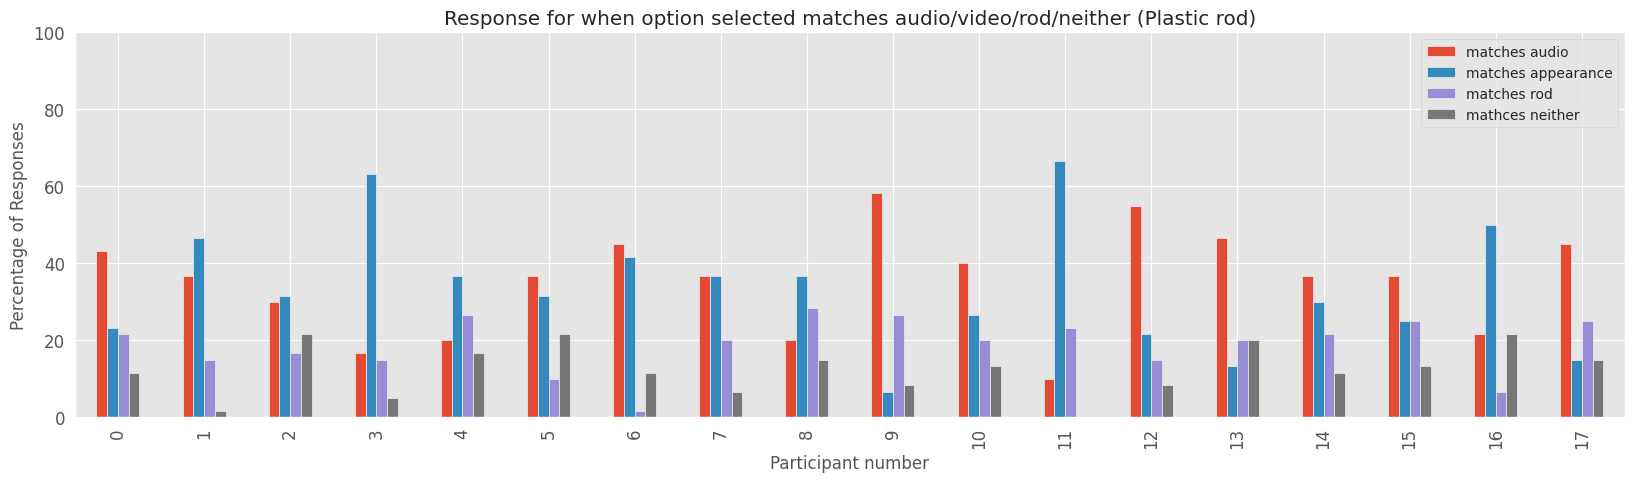

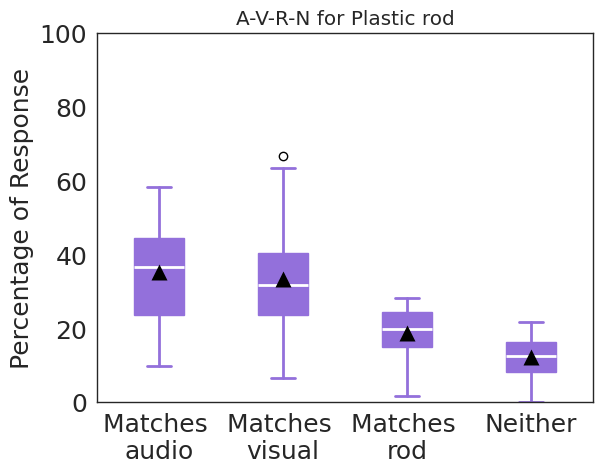

In [32]:
##dataframes and plots
df_chart_all2 = pd.DataFrame()
df_chart_all2['Matching Audio'] = matching_audio
df_chart_all2['Matching Target'] = matching_video
df_chart_all2['Matching Rod'] = matching_rod
df_chart_all2['Matching Neither'] = matching_none

mylabels = ['matches audio', 'matches appearance', 'matches rod', 'mathces neither']


print(df_chart_all2)
print(df_var3)
plt.style.use('ggplot')

# adding plot configurations to the first plot
ax1 = df_chart_all2[['Matching Audio', 'Matching Target', 'Matching Rod', 'Matching Neither']].plot(kind='bar', figsize=(20,5), legend=True, fontsize=12)
ax1.set(ylim =(0, 100))
ax1.legend(labels=mylabels)
ax1.set_title('Response for when option selected matches audio/video/rod/neither (Plastic rod)')
ax1.set_xlabel('Participant number')
ax1.set_ylabel('Percentage of Responses')
plt.savefig('A-V-R-N Response Plastic rod', bbox_inches='tight')
plt.show()

sns.set_style("white")

ax4 = df_chart_all2[['Matching Audio', 'Matching Target', 'Matching Rod', 'Matching Neither']].plot(kind='box', legend=True, widths = 0.4, fontsize=18, showmeans=True, patch_artist = True,
                               boxprops = dict(facecolor = "mediumpurple", color = 'mediumpurple'), medianprops = dict(color = "white", linewidth = 2),
                               meanprops= {'markerfacecolor': "black", 'markeredgecolor': "none", 'markersize':12},
                               whiskerprops = dict(color = "mediumpurple", linewidth = 2), capprops = dict(color = "mediumpurple", linewidth = 2))
ax4.set(ylim =(0, 100))
#ax4.set_xlabel('A/V/R/N (Metal Rod)')
labels = ['Matches \naudio', 'Matches \nvisual', 'Matches \nrod', 'Neither']
ax4.set_ylabel('Percentage of Response', fontsize = 18)
ax4.set_title('A-V-R-N for Plastic rod')
ax4.set_xticklabels(labels)
#plt.setp(ax4.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.savefig('A-V-R-N Response boxes Plastic rod', bbox_inches='tight')
plt.show()


     Participant Response Noise  Percent
0              0    Audio    NN     45.0
1              0   Visual    NN     20.0
2              0      Rod    NN     30.0
3              0  Neither    NN      5.0
4              1    Audio    NN     35.0
..           ...      ...   ...      ...
211           16  Neither    MN     25.0
212           17    Audio    MN     60.0
213           17   Visual    MN     10.0
214           17      Rod    MN     25.0
215           17  Neither    MN      5.0

[216 rows x 4 columns]


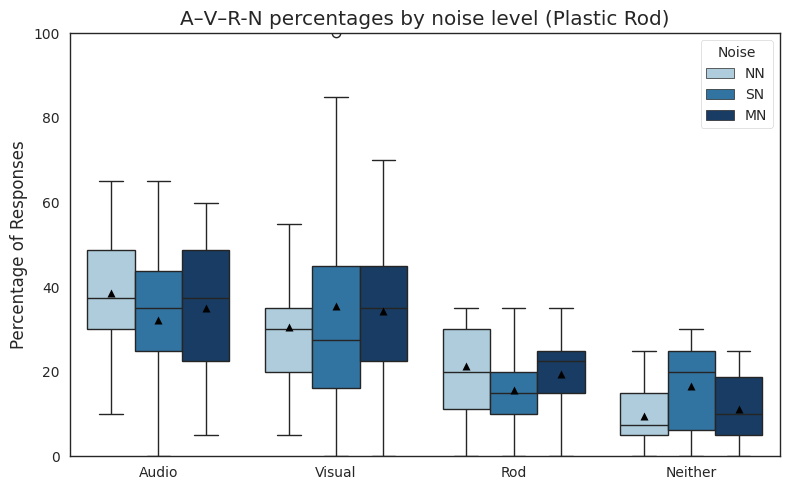

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

participants = range(len(matching_audio_1))

rows = []
def add_rows(noise, a_list, v_list, r_list, n_list):
    for pid, (a,v,r,n) in enumerate(zip(a_list, v_list, r_list, n_list)):
        rows.append({"Participant": pid, "Response": "Audio",   "Noise": noise, "Percent": a})
        rows.append({"Participant": pid, "Response": "Visual",  "Noise": noise, "Percent": v})
        rows.append({"Participant": pid, "Response": "Rod", "Noise": noise, "Percent": r})
        rows.append({"Participant": pid, "Response": "Neither", "Noise": noise, "Percent": n})

add_rows("NN", matching_audio_1, matching_video_1, matching_rod_1, matching_none_1)
add_rows("SN", matching_audio_2, matching_video_2, matching_rod_2, matching_none_2)
add_rows("MN", matching_audio_3, matching_video_3, matching_rod_3, matching_none_3)

df_resp = pd.DataFrame(rows)

print(df_resp)
# --- 3) Boxplot: 3 boxes per response, one for each noise level ---
order_resp = ["Audio", "Visual", "Rod", "Neither"]
order_noise = ["NN", "SN", "MN"]
palette = {"NN":"#a6cee3", "SN":"#1f78b4", "MN":"#0b3c6f"}  # tweak as you like

plt.figure(figsize=(8,5))
ax = sns.boxplot(
    data=df_resp, x="Response", y="Percent",
    hue="Noise", order=order_resp, hue_order=order_noise,
    palette=palette, showmeans=True,
    meanprops=dict(marker='^', markerfacecolor='black', markeredgecolor='none', markersize=6)
)
ax.set_ylim(0, 100)
ax.set_ylabel("Percentage of Responses")
ax.set_xlabel("")
ax.set_title("A–V–R-N percentages by noise level (Plastic Rod)")
ax.legend(title="Noise")
plt.tight_layout()
plt.savefig('A-V-R-N Response boxes by noise (Plastic Rod)', bbox_inches='tight')
plt.show()

# **Condition level comparison**

In [34]:
df_far = all_data[0].get('P3-NN')
print(df_check)#print(df_far)

count_g =0
count_m = 0
count_p = 0
count_w = 0
for i in df_far.index:
  if ((df_far['Target'][i] == 'Glass') and (df_far['Audio Source'][i] == 'Glass')):
    if (df_far['Option'][i] == 'Glass'):
      count_g=count_g+1
    elif (df_far['Option'][i] == 'Metal'):
      count_m=count_m+1
    elif (df_far['Option'][i] == 'Plastic'):
      count_p=count_p+1
    elif(df_far['Option'][i] == 'Wood'):
      count_w=count_w+1
print(count_g)
print(count_m)
print(count_p)
print(count_w)

     Target Secondary Object           Audio Option  Reaction Time  \
0     Metal            Glass    Glass-Glass1  Glass       4.434662   
1     Glass            Glass     Wood-Glass2   Wood       6.242470   
2      Wood            Glass     Wood-Glass2   Wood       2.485386   
3     Metal            Glass    Metal-Glass1  Metal       2.250629   
4   Plastic            Glass  Plastic-Glass2   Wood      10.333860   
..      ...              ...             ...    ...            ...   
75  Plastic            Glass  Plastic-Glass1  Metal       2.423096   
76    Metal            Glass    Glass-Glass2  Glass       2.154846   
77    Metal            Glass    Glass-Glass2  Glass       2.564087   
78  Plastic            Glass    Metal-Glass1  Metal       2.585175   
79    Metal            Glass    Metal-Glass1  Metal       2.083649   

   Audio Source Matches Audio Matches Target  Normalized RT  
0         Glass       Matches       No Match       4.434662  
1          Wood       Matches      

[np.float64(5.555555555555555), np.float64(78.33333333333333), np.float64(11.11111111111111), np.float64(5.0)]
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    2.0
13    1.0
14    NaN
15    3.0
16    NaN
17    3.0
Name: Wood, dtype: float64


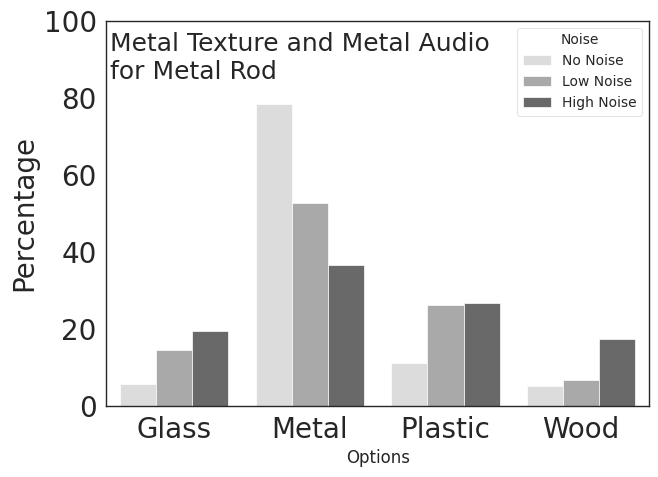

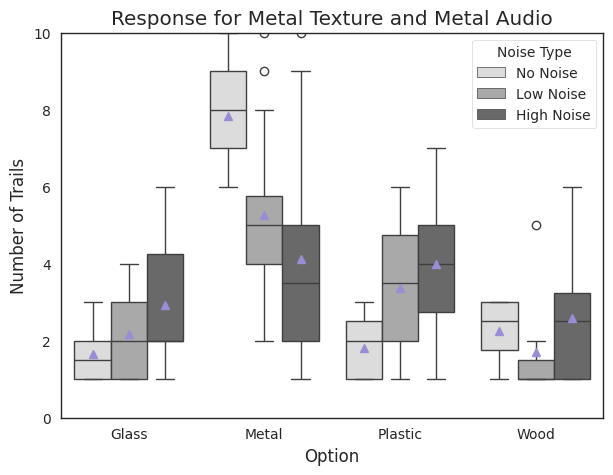

In [50]:
##check mcg across noise levels
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
'''
Noise_Categories = [NN_all, SN_all, MN_all]
Glass_Rod = [Glass_NN, Glass_SN, Glass_MN]
Metal_Rod = [Metal_NN, Metal_SN, Metal_MN]
Plastic_Rod = [Plastic_NN, Plastic_SN, Plastic_MN]

No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
More_Noise = [Glass_MN, Metal_MN, Plastic_MN]
All_Rods = [Glass_all, Metal_all, Plastic_all]
'''
'''
#1
target = 'Glass'
audio = 'Glass'

#2
target = 'Metal'
audio = 'Metal'

#3
target = 'Plastic'
audio = 'Plastic'

#4
target = 'Wood'
audio = 'Wood'

#5
target = 'Metal'
audio = 'Glass'

#6
target = 'Plastic'
audio = 'Metal'

#7
target = 'Wood'
audio = 'Plastic'

#8
target = 'Glass'
audio = 'Wood'

'''
#2
target = 'Metal'
audio = 'Metal'

df_mcg1 = pd.DataFrame()
df_mcg2 = pd.DataFrame()
df_mcg3 = pd.DataFrame()

df_mcg = [df_mcg1, df_mcg2, df_mcg3]



for j in range(len(Metal_Rod)):
  gg_glass = []
  gg_metal = []
  gg_plastic = []
  gg_wood = []
  gg_glass_time = []
  gg_metal_time = []
  gg_plastic_time = []
  gg_wood_time = []
  noise_type = []

  for sheet_name, df in Metal_Rod[j].items():
    count_g = 0
    sum_time_g = 0
    count_m = 0
    sum_time_m = 0
    count_p = 0
    sum_time_p = 0
    count_w = 0
    sum_time_w = 0
    row_count = 0

    for i in df.index:
      if ((df['Target'][i] == target) and (df['Audio Source'][i] == audio)):
        row_count = row_count+1
        if (df['Option'][i] == 'Glass'):
          count_g=count_g+1
          sum_time_g = sum_time_g + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Metal'):
          count_m=count_m+1
          sum_time_m = sum_time_m + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Plastic'):
          count_p=count_p+1
          sum_time_p = sum_time_p + df['Normalized RT'][i]
        elif(df['Option'][i] == 'Wood'):
          count_w=count_w+1
          sum_time_w = sum_time_w + df['Normalized RT'][i]

    if(count_g!=0):
      gg_glass.append(count_g)
    else:
      gg_glass.append(float('nan'))
    if(count_m!= 0):
      gg_metal.append(count_m)
    else:
      gg_metal.append(float('nan'))
    if(count_p!=0):
      gg_plastic.append(count_p)
    else:
      gg_plastic.append(float('nan'))
    if(count_w!=0):
      gg_wood.append(count_w)
    else:
      gg_wood.append(float('nan'))

    if(sum_time_g !=0):
      gg_glass_time.append(sum_time_g/count_g)
    else:
      gg_glass_time.append(float('nan'))
    if(sum_time_m !=0):
      gg_metal_time.append(sum_time_m/count_m)
    else:
      gg_metal_time.append(float('nan'))
    if(sum_time_p !=0):
      gg_plastic_time.append(sum_time_p/count_p)
    else:
      gg_plastic_time.append(float('nan'))
    if(sum_time_w !=0):
      gg_wood_time.append(sum_time_w/count_w)
    else:
      gg_wood_time.append(float('nan'))

    if(j==0):
      noise_type.append('No Noise')
    elif(j==1):
      noise_type.append('Low Noise')
    else:
      noise_type.append('High Noise')

  df_mcg[j]['Glass'] = gg_glass
  df_mcg[j]['Glass_Avg'] = gg_glass_time
  df_mcg[j]['Metal'] = gg_metal
  df_mcg[j]['Metal_Avg'] = gg_metal_time
  df_mcg[j]['Plastic'] = gg_plastic
  df_mcg[j]['Plastic_Avg'] = gg_plastic_time
  df_mcg[j]['Wood'] = gg_wood
  df_mcg[j]['Wood_Avg'] = gg_wood_time
  df_mcg[j]['Noise'] = noise_type



#print(df_mcg1)
#print(df_mcg1.describe())
mcg1_desc = pd.DataFrame()
mcg1_desc = df_mcg1.describe()
#mcg1_means = [df_mcg1['Glass'].sum()/16*10, df_mcg1['Metal'].sum()/16*10, df_mcg1['Plastic'].sum()/16*10, df_mcg1['Wood'].sum()/16*10]
mcg1_means = [df_mcg1['Glass'].sum()/18*10, df_mcg1['Metal'].sum()/18*10, df_mcg1['Plastic'].sum()/18*10, df_mcg1['Wood'].sum()/18*10]
print(mcg1_means)
print(df_mcg[0]['Wood'])

mcg2_desc = pd.DataFrame()
mcg2_desc = df_mcg2.describe()
#mcg2_means = [df_mcg2['Glass'].sum()/16*10, df_mcg2['Metal'].sum()/16*10, df_mcg2['Plastic'].sum()/16*10, df_mcg2['Wood'].sum()/16*10]
mcg2_means = [df_mcg2['Glass'].sum()/18*10, df_mcg2['Metal'].sum()/18*10, df_mcg2['Plastic'].sum()/18*10, df_mcg2['Wood'].sum()/18*10]

#print(mcg2_desc)

mcg3_desc = pd.DataFrame()
mcg3_desc = df_mcg3.describe()
#print(mcg3_desc)
#mcg3_means = [df_mcg3['Glass'].sum()/16*10, df_mcg3['Metal'].sum()/16*10, df_mcg3['Plastic'].sum()/16*10, df_mcg3['Wood'].sum()/16*10]
mcg3_means = [df_mcg3['Glass'].sum()/18*10, df_mcg3['Metal'].sum()/18*10, df_mcg3['Plastic'].sum()/18*10, df_mcg3['Wood'].sum()/18*10]

df_mcg_concat = pd.concat(df_mcg)
df_mcg_concat.reset_index(drop=True, inplace=True)
#print(df_mcg_concat)


option = []
response = []
noise = []

for i in df_mcg_concat.index:
  option.append('Glass')
  response.append(df_mcg_concat['Glass'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Metal')
  response.append(df_mcg_concat['Metal'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Plastic')
  response.append(df_mcg_concat['Plastic'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Wood')
  response.append(df_mcg_concat['Wood'][i])
  noise.append(df_mcg_concat['Noise'][i])

df_chart_mcg = pd.DataFrame()
df_chart_mcg['Option'] = option
df_chart_mcg['Response'] = response
df_chart_mcg['Noise Type'] = noise

#print(df_chart_mcg)

sns.set_style("white")

data = {'Options': ['Glass', 'Glass', 'Glass',
                    'Metal', 'Metal', 'Metal',
                    'Plastic', 'Plastic', 'Plastic',
                    'Wood', 'Wood', 'Wood'],
        'Response': [mcg1_means[0], mcg2_means[0], mcg3_means[0],
                     mcg1_means[1], mcg2_means[1], mcg3_means[1],
                     mcg1_means[2], mcg2_means[2], mcg3_means[2],
                     mcg1_means[3], mcg2_means[3], mcg3_means[3]],
        'Average Time': [mcg1_desc['Glass_Avg']['mean'], mcg2_desc['Glass_Avg']['mean'], mcg3_desc['Glass_Avg']['mean'],
                     mcg1_desc['Metal_Avg']['mean'], mcg2_desc['Metal_Avg']['mean'], mcg3_desc['Metal_Avg']['mean'],
                     mcg1_desc['Plastic_Avg']['mean'], mcg2_desc['Plastic_Avg']['mean'], mcg3_desc['Plastic_Avg']['mean'],
                     mcg1_desc['Wood_Avg']['mean'], mcg2_desc['Wood_Avg']['mean'], mcg3_desc['Wood_Avg']['mean']],
        'Noise': ['No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise']
        }
df = pd.DataFrame(data)

#my_pal = {"No Noise": "salmon", "Low Noise": "orangered", "High Noise":"maroon"} #all condition
my_pal = {"No Noise": "gainsboro", "Low Noise": "darkgrey", "High Noise":"dimgray"} #for metal
#my_pal = {"No Noise": "paleturquoise", "Low Noise": "turquoise", "High Noise":"teal"} #for glass
#my_pal = {"No Noise": "lightsteelblue", "Low Noise": "cornflowerblue", "High Noise":"royalblue"} #plastic


fig, ax6 = plt.subplots(figsize=(7,5))
#ax6.set_title('Average time overall')
ax6.set(ylim =(0, 100))
sns.barplot(x="Options", y="Response", data=df,  hue="Noise", palette=my_pal)
ax6.tick_params(labelsize=20)
ax6.text(0.05, 0.85, target + ' Texture and '+ audio + ' Audio \nfor Metal Rod' , transform=ax.transAxes, fontsize=18)
#ax6.text(0.40, 0.90, target + ' Texture and '+ audio + ' ', transform=ax.transAxes, fontsize=18)
#ax6.set_title(target + ' Texture and '+ audio + ' Audio')
ax6.set_ylabel("Percentage", fontsize=20)
plt.savefig('Metal-'+target + '-'+ audio +'.png', bbox_inches='tight')
plt.show()



fig, ax2 = plt.subplots(figsize=(7,5))
sns.boxplot(data=df_chart_mcg, x="Option", y="Response", hue="Noise Type", showmeans=True, palette=my_pal)
ax2.set_title('Response for '+ target + ' Texture and '+ audio + ' Audio')
ax2.set_ylabel("Number of Trails")
ax2.set(ylim =(0, 10))
plt.show()

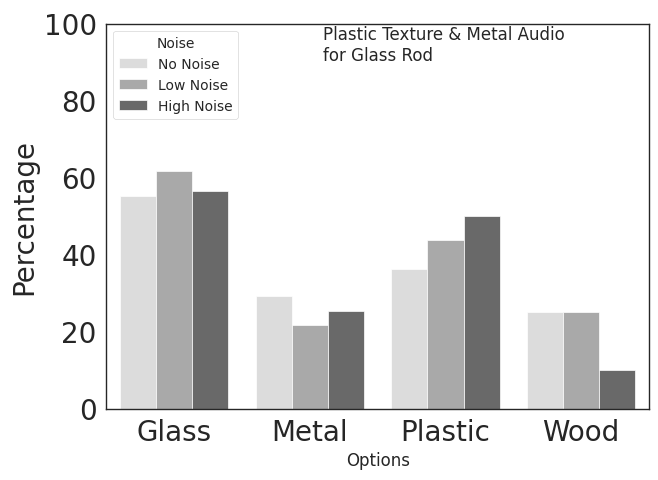

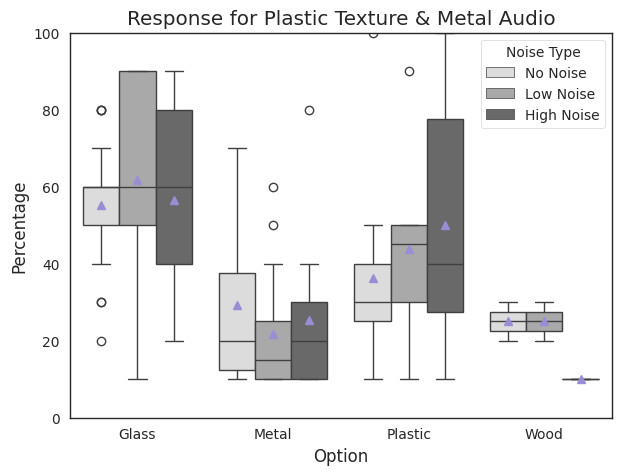

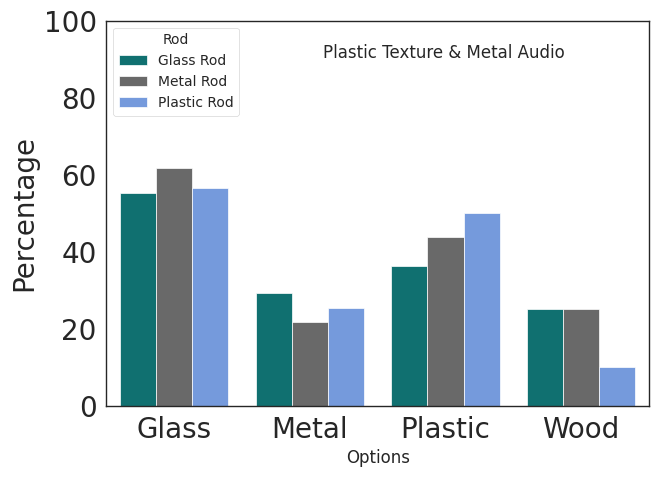

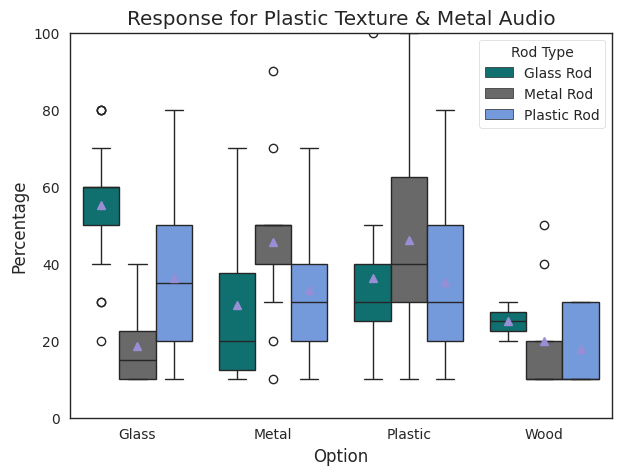

In [51]:
##check mcg across noise levels

'''
Noise_Categories = [NN_all, SN_all, MN_all]
Glass_Rod = [Glass_NN, Glass_SN, Glass_MN]
Metal_Rod = [Metal_NN, Metal_SN, Metal_MN]
Plastic_Rod = [Plastic_NN, Plastic_SN, Plastic_MN]

No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
More_Noise = [Glass_MN, Metal_MN, Plastic_MN]
All_Rods = [Glass_all, Metal_all, Plastic_all]
'''
'''
#1
target = 'Glass'
audio = 'Glass'

#2
target = 'Metal'
audio = 'Metal'

#3
target = 'Plastic'
audio = 'Plastic'

#4
target = 'Wood'
audio = 'Wood'

#5
target = 'Metal'
audio = 'Glass'

#6
target = 'Plastic'
audio = 'Metal'

#7
target = 'Wood'
audio = 'Plastic'

#8
target = 'Glass'
audio = 'Wood'

'''
#6
target = 'Plastic'
audio = 'Metal'


df_mcg1 = pd.DataFrame()
df_mcg2 = pd.DataFrame()
df_mcg3 = pd.DataFrame()

df_mcg = [df_mcg1, df_mcg2, df_mcg3]



for j in range(len(Glass_Rod)):
  gg_glass = []
  gg_metal = []
  gg_plastic = []
  gg_wood = []
  gg_glass_time = []
  gg_metal_time = []
  gg_plastic_time = []
  gg_wood_time = []
  noise_type = []

  for sheet_name, df in Glass_Rod[j].items():
    count_g = 0
    sum_time_g = 0
    count_m = 0
    sum_time_m = 0
    count_p = 0
    sum_time_p = 0
    count_w = 0
    sum_time_w = 0
    row_count = 0

    for i in df.index:
      if ((df['Target'][i] == target) and (df['Audio Source'][i] == audio)):
        row_count = row_count+1
        if (df['Option'][i] == 'Glass'):
          count_g=count_g+1
          sum_time_g = sum_time_g + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Metal'):
          count_m=count_m+1
          sum_time_m = sum_time_m + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Plastic'):
          count_p=count_p+1
          sum_time_p = sum_time_p + df['Normalized RT'][i]
        elif(df['Option'][i] == 'Wood'):
          count_w=count_w+1
          sum_time_w = sum_time_w + df['Normalized RT'][i]

    if(count_g!=0):
      gg_glass.append((count_g/row_count)*100)
    else:
      gg_glass.append(float('nan'))
    if(count_m!= 0):
      gg_metal.append((count_m/row_count)*100)
    else:
      gg_metal.append(float('nan'))
    if(count_p!=0):
      gg_plastic.append((count_p/row_count)*100)
    else:
      gg_plastic.append(float('nan'))
    if(count_w!=0):
      gg_wood.append((count_w/row_count)*100)
    else:
      gg_wood.append(float('nan'))

    if(sum_time_g !=0):
      gg_glass_time.append(sum_time_g/count_g)
    else:
      gg_glass_time.append(float('nan'))
    if(sum_time_m !=0):
      gg_metal_time.append(sum_time_m/count_m)
    else:
      gg_metal_time.append(float('nan'))
    if(sum_time_p !=0):
      gg_plastic_time.append(sum_time_p/count_p)
    else:
      gg_plastic_time.append(float('nan'))
    if(sum_time_w !=0):
      gg_wood_time.append(sum_time_w/count_w)
    else:
      gg_wood_time.append(float('nan'))

    if(j==0):
      noise_type.append('No Noise')
    elif(j==1):
      noise_type.append('Low Noise')
    else:
      noise_type.append('High Noise')

  df_mcg[j]['Glass'] = gg_glass
  df_mcg[j]['Glass_Avg'] = gg_glass_time
  df_mcg[j]['Metal'] = gg_metal
  df_mcg[j]['Metal_Avg'] = gg_metal_time
  df_mcg[j]['Plastic'] = gg_plastic
  df_mcg[j]['Plastic_Avg'] = gg_plastic_time
  df_mcg[j]['Wood'] = gg_wood
  df_mcg[j]['Wood_Avg'] = gg_wood_time
  df_mcg[j]['Noise'] = noise_type



#print(df_mcg1)
#print(df_mcg1.describe())
mcg1_desc = pd.DataFrame()
mcg1_desc = df_mcg1.describe()

mcg2_desc = pd.DataFrame()
mcg2_desc = df_mcg2.describe()
#print(mcg2_desc)

mcg3_desc = pd.DataFrame()
mcg3_desc = df_mcg3.describe()
#print(mcg3_desc)


df_mcg_concat = pd.concat(df_mcg)
df_mcg_concat.reset_index(drop=True, inplace=True)
#print(df_mcg_concat)


option = []
response = []
noise = []

for i in df_mcg_concat.index:
  option.append('Glass')
  response.append(df_mcg_concat['Glass'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Metal')
  response.append(df_mcg_concat['Metal'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Plastic')
  response.append(df_mcg_concat['Plastic'][i])
  noise.append(df_mcg_concat['Noise'][i])

  option.append('Wood')
  response.append(df_mcg_concat['Wood'][i])
  noise.append(df_mcg_concat['Noise'][i])

df_chart_mcg = pd.DataFrame()
df_chart_mcg['Option'] = option
df_chart_mcg['Response'] = response
df_chart_mcg['Noise Type'] = noise

#print(df_chart_mcg)

sns.set_style("white")

data = {'Options': ['Glass', 'Glass', 'Glass',
                    'Metal', 'Metal', 'Metal',
                    'Plastic', 'Plastic', 'Plastic',
                    'Wood', 'Wood', 'Wood'],
        'Response': [mcg1_desc['Glass']['mean'], mcg2_desc['Glass']['mean'], mcg3_desc['Glass']['mean'],
                     mcg1_desc['Metal']['mean'], mcg2_desc['Metal']['mean'], mcg3_desc['Metal']['mean'],
                     mcg1_desc['Plastic']['mean'], mcg2_desc['Plastic']['mean'], mcg3_desc['Plastic']['mean'],
                     mcg1_desc['Wood']['mean'], mcg2_desc['Wood']['mean'], mcg3_desc['Wood']['mean']],
        'Average Time': [mcg1_desc['Glass_Avg']['mean'], mcg2_desc['Glass_Avg']['mean'], mcg3_desc['Glass_Avg']['mean'],
                     mcg1_desc['Metal_Avg']['mean'], mcg2_desc['Metal_Avg']['mean'], mcg3_desc['Metal_Avg']['mean'],
                     mcg1_desc['Plastic_Avg']['mean'], mcg2_desc['Plastic_Avg']['mean'], mcg3_desc['Plastic_Avg']['mean'],
                     mcg1_desc['Wood_Avg']['mean'], mcg2_desc['Wood_Avg']['mean'], mcg3_desc['Wood_Avg']['mean']],
        'Noise': ['No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise',
                  'No Noise', 'Low Noise', 'High Noise']
        }
df = pd.DataFrame(data)

#my_pal = {"No Noise": "salmon", "Low Noise": "orangered", "High Noise":"maroon"} #all condition
my_pal = {"No Noise": "gainsboro", "Low Noise": "darkgrey", "High Noise":"dimgray"} #for metal
#my_pal = {"No Noise": "paleturquoise", "Low Noise": "turquoise", "High Noise":"teal"} #for glass
#my_pal = {"No Noise": "lightsteelblue", "Low Noise": "cornflowerblue", "High Noise":"royalblue"} #plastic


fig, ax6 = plt.subplots(figsize=(7,5))
#ax6.set_title('Average time overall')
ax6.set(ylim =(0, 100))
sns.barplot(x="Options", y="Response", data=df,  hue="Noise", palette=my_pal)
ax6.tick_params(labelsize=20)
ax6.text(0.35, 0.90, target + ' Texture & '+ audio + ' Audio \nfor Glass Rod' , transform=ax.transAxes, fontsize=12)
ax6.set_ylabel("Percentage", fontsize=20)
plt.show()



fig, ax2 = plt.subplots(figsize=(7,5))
sns.boxplot(data=df_chart_mcg, x="Option", y="Response", hue="Noise Type", showmeans=True, palette=my_pal)
ax2.set_title('Response for '+ target + ' Texture & '+ audio + ' Audio')
ax2.set_ylabel("Percentage")
ax2.set(ylim =(0, 100))
plt.show()

df_mcg4 = pd.DataFrame()
df_mcg5 = pd.DataFrame()
df_mcg6 = pd.DataFrame()

df_mcg = [df_mcg4, df_mcg5, df_mcg6]


#Comparing the same condition, same noise level across different rods
#change the dictionary being iterated on for the different noise levels at first two loop conditions
'''
No_Noise = [Glass_NN, Metal_NN, Plastic_NN]
Some_Noise = [Glass_SN, Metal_SN, Plastic_SN]
More_Noise = [Glass_MN, Metal_MN, Plastic_MN]
All_Rods = [Glass_all, Metal_all, Plastic_all]
'''
#adjust loop condition based on noise condition desired
for j in range(len(No_Noise)):
  gg_glass = []
  gg_metal = []
  gg_plastic = []
  gg_wood = []
  gg_glass_time = []
  gg_metal_time = []
  gg_plastic_time = []
  gg_wood_time = []
  rod_type = []

#adjust loop condition based on noise condition desired, keep it same as the above loop conidition
  for sheet_name, df in No_Noise[j].items():
    count_g = 0
    sum_time_g = 0
    count_m = 0
    sum_time_m = 0
    count_p = 0
    sum_time_p = 0
    count_w = 0
    sum_time_w = 0
    row_count = 0

    for i in df.index:
      if ((df['Target'][i] == target) and (df['Audio Source'][i] == audio)):
        row_count = row_count+1
        if (df['Option'][i] == 'Glass'):
          count_g=count_g+1
          sum_time_g = sum_time_g + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Metal'):
          count_m=count_m+1
          sum_time_m = sum_time_m + df['Normalized RT'][i]
        elif (df['Option'][i] == 'Plastic'):
          count_p=count_p+1
          sum_time_p = sum_time_p + df['Normalized RT'][i]
        elif(df['Option'][i] == 'Wood'):
          count_w=count_w+1
          sum_time_w = sum_time_w + df['Normalized RT'][i]

    if(count_g!=0):
      gg_glass.append((count_g/row_count)*100)
    else:
      gg_glass.append(float('nan'))
    if(count_m!= 0):
      gg_metal.append((count_m/row_count)*100)
    else:
      gg_metal.append(float('nan'))
    if(count_p!=0):
      gg_plastic.append((count_p/row_count)*100)
    else:
      gg_plastic.append(float('nan'))
    if(count_w!=0):
      gg_wood.append((count_w/row_count)*100)
    else:
      gg_wood.append(float('nan'))

    if(sum_time_g !=0):
      gg_glass_time.append(sum_time_g/count_g)
    else:
      gg_glass_time.append(float('nan'))
    if(sum_time_m !=0):
      gg_metal_time.append(sum_time_m/count_m)
    else:
      gg_metal_time.append(float('nan'))
    if(sum_time_p !=0):
      gg_plastic_time.append(sum_time_p/count_p)
    else:
      gg_plastic_time.append(float('nan'))
    if(sum_time_w !=0):
      gg_wood_time.append(sum_time_w/count_w)
    else:
      gg_wood_time.append(float('nan'))

    if(j==0):
      rod_type.append('Glass Rod')
    elif(j==1):
      rod_type.append('Metal Rod')
    else:
      rod_type.append('Plastic Rod')

  df_mcg[j]['Glass'] = gg_glass
  df_mcg[j]['Glass_Avg'] = gg_glass_time
  df_mcg[j]['Metal'] = gg_metal
  df_mcg[j]['Metal_Avg'] = gg_metal_time
  df_mcg[j]['Plastic'] = gg_plastic
  df_mcg[j]['Plastic_Avg'] = gg_plastic_time
  df_mcg[j]['Wood'] = gg_wood
  df_mcg[j]['Wood_Avg'] = gg_wood_time
  df_mcg[j]['Rod'] = rod_type



#print(df_mcg1)
#print(df_mcg1.describe())
mcg1_desc = pd.DataFrame()
mcg1_desc = df_mcg1.describe()

mcg2_desc = pd.DataFrame()
mcg2_desc = df_mcg2.describe()
#print(mcg2_desc)

mcg3_desc = pd.DataFrame()
mcg3_desc = df_mcg3.describe()
#print(mcg3_desc)


df_mcg_concat = pd.concat(df_mcg)
df_mcg_concat.reset_index(drop=True, inplace=True)
#print(df_mcg_concat)


option = []
response = []
rod = []

for i in df_mcg_concat.index:
  option.append('Glass')
  response.append(df_mcg_concat['Glass'][i])
  rod.append(df_mcg_concat['Rod'][i])

  option.append('Metal')
  response.append(df_mcg_concat['Metal'][i])
  rod.append(df_mcg_concat['Rod'][i])

  option.append('Plastic')
  response.append(df_mcg_concat['Plastic'][i])
  rod.append(df_mcg_concat['Rod'][i])

  option.append('Wood')
  response.append(df_mcg_concat['Wood'][i])
  rod.append(df_mcg_concat['Rod'][i])

df_chart_mcg = pd.DataFrame()
df_chart_mcg['Option'] = option
df_chart_mcg['Response'] = response
df_chart_mcg['Rod Type'] = rod

#print(df_chart_mcg)

sns.set_style("white")

data = {'Options': ['Glass', 'Glass', 'Glass',
                    'Metal', 'Metal', 'Metal',
                    'Plastic', 'Plastic', 'Plastic',
                    'Wood', 'Wood', 'Wood'],
        'Response': [mcg1_desc['Glass']['mean'], mcg2_desc['Glass']['mean'], mcg3_desc['Glass']['mean'],
                     mcg1_desc['Metal']['mean'], mcg2_desc['Metal']['mean'], mcg3_desc['Metal']['mean'],
                     mcg1_desc['Plastic']['mean'], mcg2_desc['Plastic']['mean'], mcg3_desc['Plastic']['mean'],
                     mcg1_desc['Wood']['mean'], mcg2_desc['Wood']['mean'], mcg3_desc['Wood']['mean']],
        'Average Time': [mcg1_desc['Glass_Avg']['mean'], mcg2_desc['Glass_Avg']['mean'], mcg3_desc['Glass_Avg']['mean'],
                     mcg1_desc['Metal_Avg']['mean'], mcg2_desc['Metal_Avg']['mean'], mcg3_desc['Metal_Avg']['mean'],
                     mcg1_desc['Plastic_Avg']['mean'], mcg2_desc['Plastic_Avg']['mean'], mcg3_desc['Plastic_Avg']['mean'],
                     mcg1_desc['Wood_Avg']['mean'], mcg2_desc['Wood_Avg']['mean'], mcg3_desc['Wood_Avg']['mean']],
        'Rod': ['Glass Rod', 'Metal Rod', 'Plastic Rod',
                'Glass Rod', 'Metal Rod', 'Plastic Rod',
                'Glass Rod', 'Metal Rod', 'Plastic Rod',
                'Glass Rod', 'Metal Rod', 'Plastic Rod']
        }
df = pd.DataFrame(data)

my_pal = {"Glass Rod": "teal", "Metal Rod": "dimgrey", "Plastic Rod":"cornflowerblue"}


fig, ax6 = plt.subplots(figsize=(7,5))
#ax6.set_title('Average time overall')
ax6.set(ylim =(0, 100))
sns.barplot(x="Options", y="Response", data=df,  hue="Rod", palette=my_pal)
ax6.tick_params(labelsize=20)
ax6.text(0.35, 0.90, target + ' Texture & '+ audio + ' Audio', transform=ax.transAxes, fontsize=12)
ax6.set_ylabel("Percentage", fontsize=20)
plt.show()



fig, ax2 = plt.subplots(figsize=(7,5))
sns.boxplot(data=df_chart_mcg, x="Option", y="Response", hue="Rod Type", showmeans=True, palette=my_pal)
ax2.set_title('Response for '+ target + ' Texture & '+ audio + ' Audio')
ax2.set_ylabel("Percentage")
ax2.set(ylim =(0, 100))
plt.show()


